In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

(65, 71, 12)


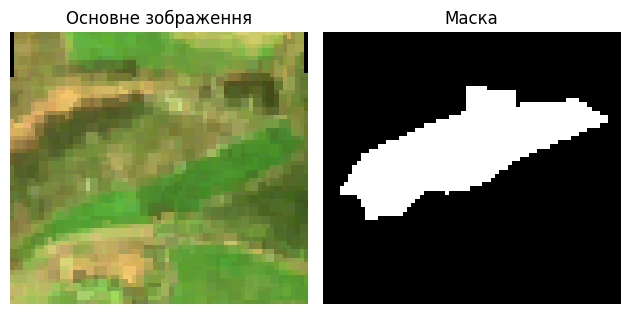

In [2]:
from PIL import Image
import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Відкриття TIF файлу для основного зображення
image = tifffile.imread('/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/0/geojson_0-2017-04-01-2017-04-11-S2.tif')
print(image.shape)

# Конвертація в RGB
rgb_image = np.stack([image[..., 3], image[..., 2], image[..., 1]], axis=-1) * 12

# Відображення основного зображення
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.axis('off')
plt.title('Основне зображення')

# Відкриття TIF файлу для маски
mask = tifffile.imread('/kaggle/input/eripthack-data/damage_masks/geojson_0_mask.tif')

# Відображення маски
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('Маска')

plt.tight_layout()
plt.show()


In [3]:
np.nan_to_num(rgb_image, nan=0).max()

0.96959996

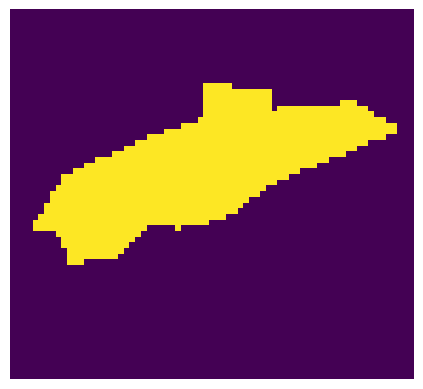

In [4]:
from PIL import Image
import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Відкриття TIF файлу
image = tifffile.imread('/kaggle/input/eripthack-data/damage_masks/geojson_0_mask.tif')

# Вибір одного каналу (наприклад, B1)
# channel = 10
# image_channel = image[..., channel]

# Відображення зображення
plt.imshow(image)
plt.axis('off')
plt.show()

(65, 71)


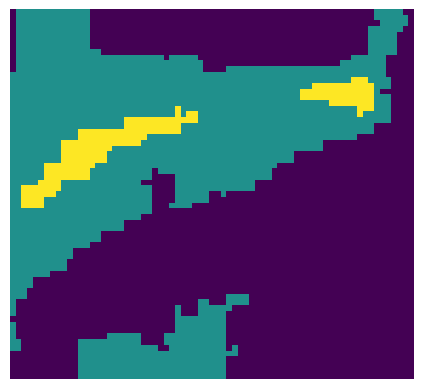

In [5]:
from PIL import Image
import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Відкриття TIF файлу
image = tifffile.imread('/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/0/geojson_0_forest_type_2018.tif')

# Вибір одного каналу (наприклад, B1)
# channel = 10
# image_channel = image[..., channel]
print(image.shape)
# Відображення зображення
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
# Відкриття TIF файлу
image = Image.open('/kaggle/input/eripthack-data/damage_masks/geojson_0_mask.tif')

# Відображення зображення
image.show()

In [7]:
import os
import tifffile
import numpy as np
from skimage.transform import resize

# Шлях до папки з файлами TF-IDF
tfidf_folder = '/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/'

# Шлях до папки з файлами масок
mask_folder = '/kaggle/input/eripthack-data/damage_masks'

# Розміри зображення після зміни розміру
img_height = 128
img_width = 128

# Список файлів TF-IDF
file_list_X = []
mask_list = []

mask_paths = os.listdir('/kaggle/input/eripthack-data/damage_masks/')

# Прочитати всі файли TF-IDF за жовтень 2018 року
for root, dirs, files in os.walk(tfidf_folder):
    for file in files:
        if file.endswith('.tif') and '2018-10' in file:
            folder = root.split('/')[-1]
            mask_path = f'geojson_{folder}_mask.tif'
            if mask_path in mask_paths:
                file_path = os.path.join(root, file)
                file_list_X.append(file_path)
                mask_list.append(f'/kaggle/input/eripthack-data/damage_masks/geojson_{folder}_mask.tif')

# Зчитати файли TF-IDF у змінну X
X = np.concatenate([resize(tifffile.imread(file_path), (img_height, img_width))[None] for file_path in file_list_X], axis=0)

# Зчитати файли масок у змінну y
y = np.concatenate([resize(tifffile.imread(mask_path), (img_height, img_width))[None] for mask_path in mask_list], axis=0)

# Вивести розмірність масивів X та y
print("Розмірність X:", X.shape)
print("Розмірність y:", y.shape)

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmpzfp_sxyp.PNG'
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/skimage/transform/_warps.py:674: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/opt/conda/lib/python3.10/site-packages/skimage/transform/_warps.py:678: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


Розмірність X: (147, 128, 128, 12)
Розмірність y: (147, 128, 128)


In [8]:
# Get image sizes in X
image_sizes = [image.shape for image in X]

# Calculate statistics
min_size = np.min(image_sizes, axis=0)
max_size = np.max(image_sizes, axis=0)
mean_size = np.mean(image_sizes, axis=0)
std_size = np.std(image_sizes, axis=0)

# Print statistics
print("Minimum image size:", min_size)
print("Maximum image size:", max_size)
print("Mean image size:", mean_size)
print("Standard deviation of image size:", std_size)

Minimum image size: [128 128  12]
Maximum image size: [128 128  12]
Mean image size: [128. 128.  12.]
Standard deviation of image size: [0. 0. 0.]


In [9]:
# Get mask sizes in y
mask_sizes = [mask.shape for mask in y]

# Calculate statistics
min_size = np.min(mask_sizes, axis=0)
max_size = np.max(mask_sizes, axis=0)
mean_size = np.mean(mask_sizes, axis=0)
std_size = np.std(mask_sizes, axis=0)

# Print statistics
print("Minimum mask size:", min_size)
print("Maximum mask size:", max_size)
print("Mean mask size:", mean_size)
print("Standard deviation of mask size:", std_size)


Minimum mask size: [128 128]
Maximum mask size: [128 128]
Mean mask size: [128. 128.]
Standard deviation of mask size: [0. 0.]


In [10]:
# Check if shapes of masks correspond to shapes of images
for image, mask in zip(X, y):
    image_shape = image.shape[:-1]
    mask_shape = mask.shape
    if image_shape != mask_shape:
        print("Image shape:", image_shape)
        print("Mask shape:", mask_shape)
        print("Shape mismatch for an image and its mask!")

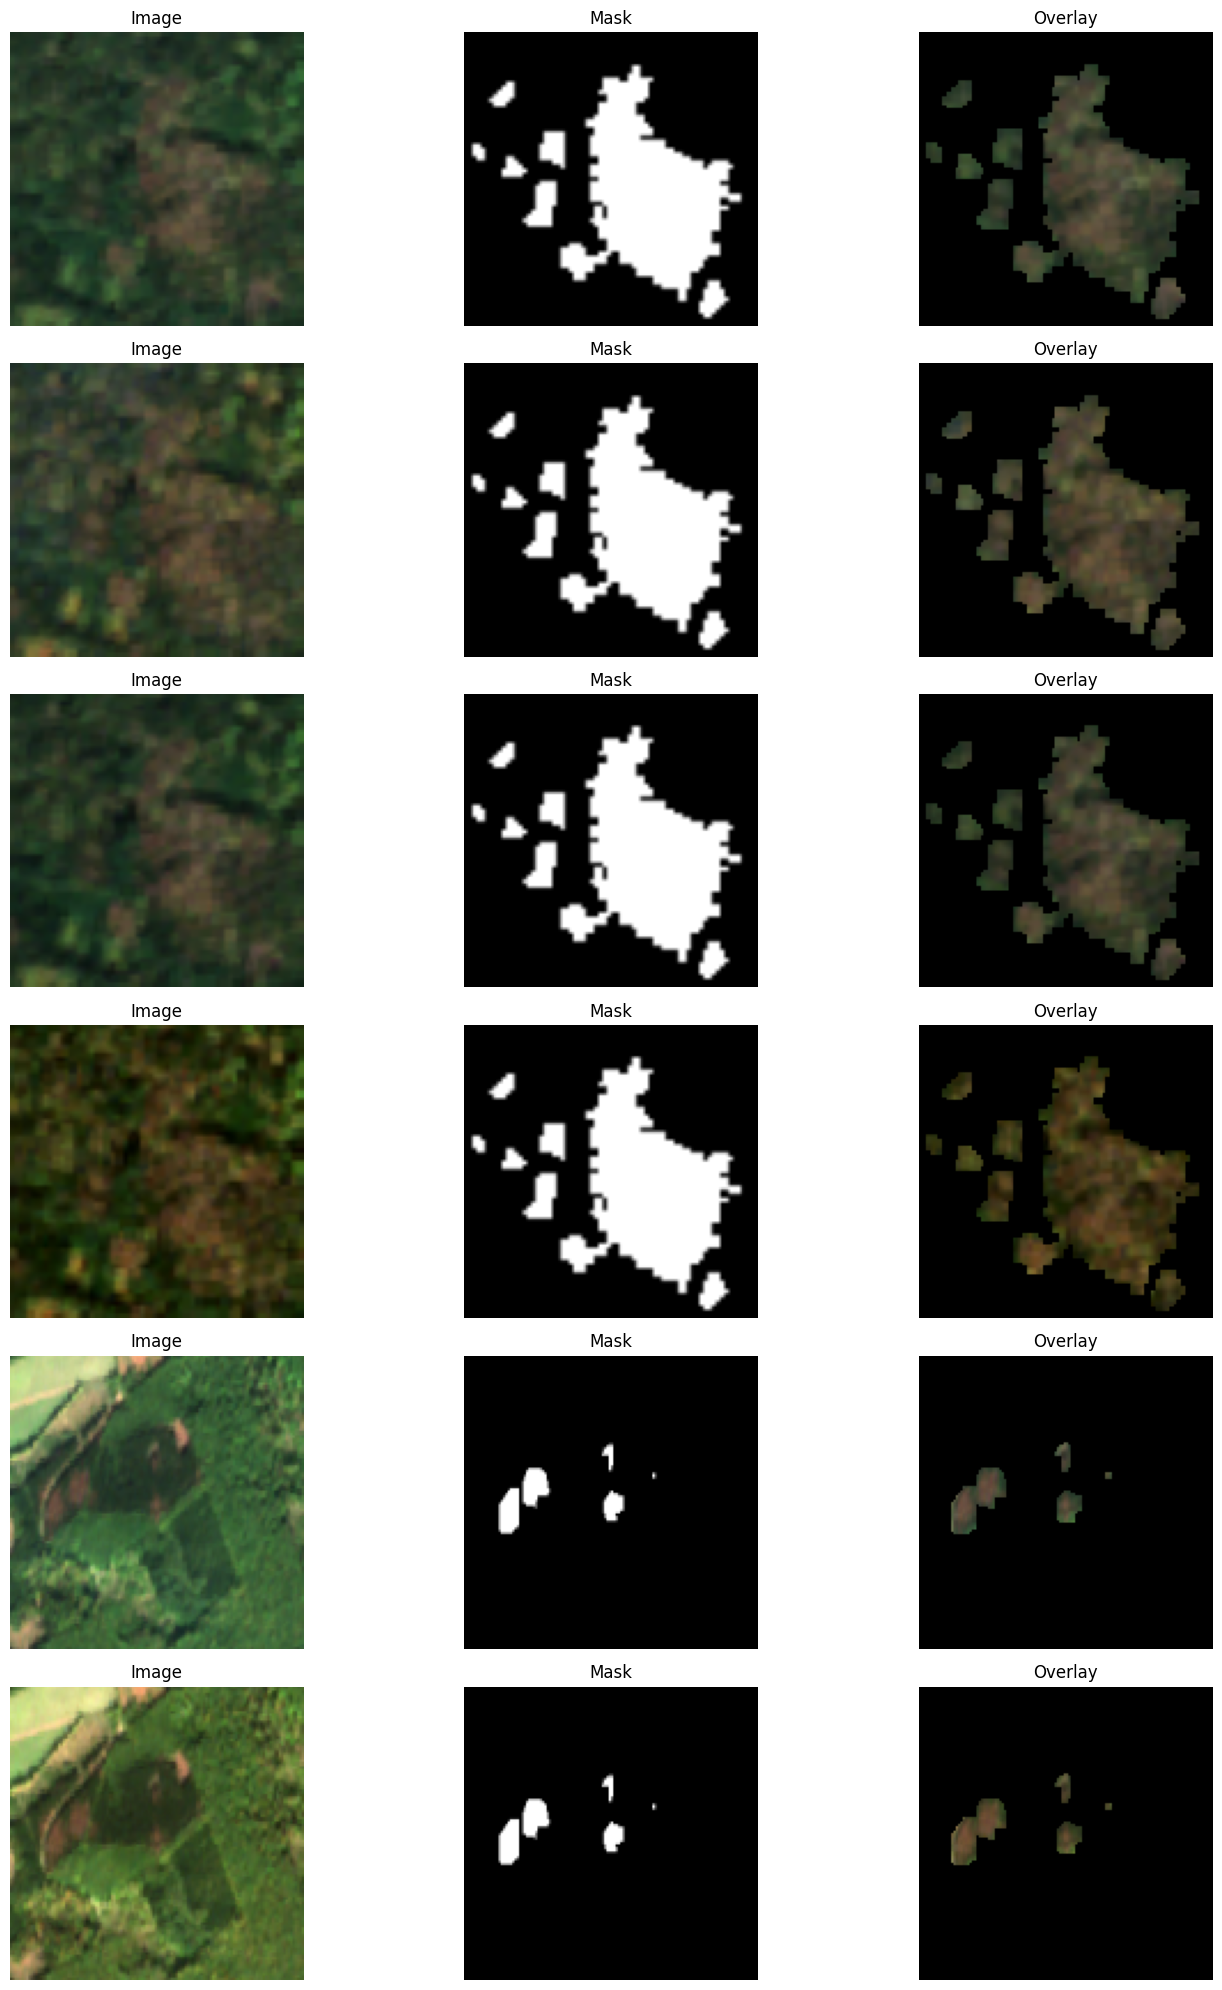

In [11]:
import matplotlib.pyplot as plt

# Define the number of rows and columns
rows = 6
columns = 3

# Set the figure size
plt.figure(figsize=(15, 20))

# Iterate over the rows and display images, masks, and overlays
for i in range(rows):
    # Extract channels 1, 3, and 4 from the image
    image_channels = X[i][..., [3, 2, 1]] * 10

    # Display the image in the first column
    plt.subplot(rows, columns, i * columns + 1)
    plt.imshow(image_channels)
    plt.axis('off')
    plt.title('Image')

    # Display the mask in the second column
    plt.subplot(rows, columns, i * columns + 2)
    plt.imshow(y[i], cmap='gray')
    plt.axis('off')
    plt.title('Mask')

    # Expand dimensions of the mask to match the number of channels in the image
    expanded_mask = np.expand_dims(y[i], axis=-1)

    # Overlay the image and mask in the third column
    overlay = np.where(expanded_mask > 0, image_channels, 0)
    plt.subplot(rows, columns, i * columns + 3)
    plt.imshow(overlay)
    plt.axis('off')
    plt.title('Overlay')

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig('masked_images.png')
# Show the figure
plt.show()

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

def unet_model(input_shape):
    inputs = keras.Input(shape=input_shape)

    # Contracting Path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Expanding Path
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    concat6 = layers.concatenate([up6, conv4])
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(concat6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    concat7 = layers.concatenate([up7, conv3])
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(concat7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    concat8 = layers.concatenate([up8, conv2])
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    concat9 = layers.concatenate([up9, conv1])
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(concat9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    # Binarization
    binary_outputs = layers.Lambda(lambda x: keras.backend.round(x))(outputs)

    model = keras.Model(inputs=inputs, outputs=outputs)

    return model


### 12 Channels

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

# Set up data augmentation
data_gen_args = dict(
    rotation_range=10,        # Random rotation between -10 and +10 degrees
    width_shift_range=0.1,    # Randomly shift width by 0.1
    height_shift_range=0.1,   # Randomly shift height by 0.1
    shear_range=0.2,          # Shear transformation with a range of 0.2
    zoom_range=0.2,           # Randomly zoom in/out with a range of 0.2
    horizontal_flip=True,     # Randomly flip images horizontally
    vertical_flip=True       # Randomly flip images vertically
)

# Create an instance of ImageDataGenerator for X data augmentation
image_data_generator = ImageDataGenerator(**data_gen_args)

# Create an instance of ImageDataGenerator for y_binary data augmentation
mask_data_generator = ImageDataGenerator(**data_gen_args)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the seed for reproducibility
seed = 42

# Generate augmented training data for X
X_train_augmented = image_data_generator.flow(X_train, batch_size=16, seed=seed)

# Generate augmented validation data for X
X_val_augmented = image_data_generator.flow(X_val, batch_size=16, seed=seed)

# Reshape y_train to include the channel dimension
y_train = np.expand_dims(y_train, axis=-1)

# Reshape y_val to include the channel dimension
y_val = np.expand_dims(y_val, axis=-1)

# Generate augmented training data for y_binary
y_train_augmented = mask_data_generator.flow(y_train, batch_size=16, seed=seed)

# Generate augmented validation data for y_binary
y_val_augmented = mask_data_generator.flow(y_val, batch_size=16, seed=seed)

# Combine X and y generators into a single generator
train_generator = zip(X_train_augmented, y_train_augmented)
val_generator = zip(X_val_augmented, y_val_augmented)

/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (117, 128, 128, 12) (12 channels).
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (30, 128, 128, 12) (12 channels).
  warnings.warn(


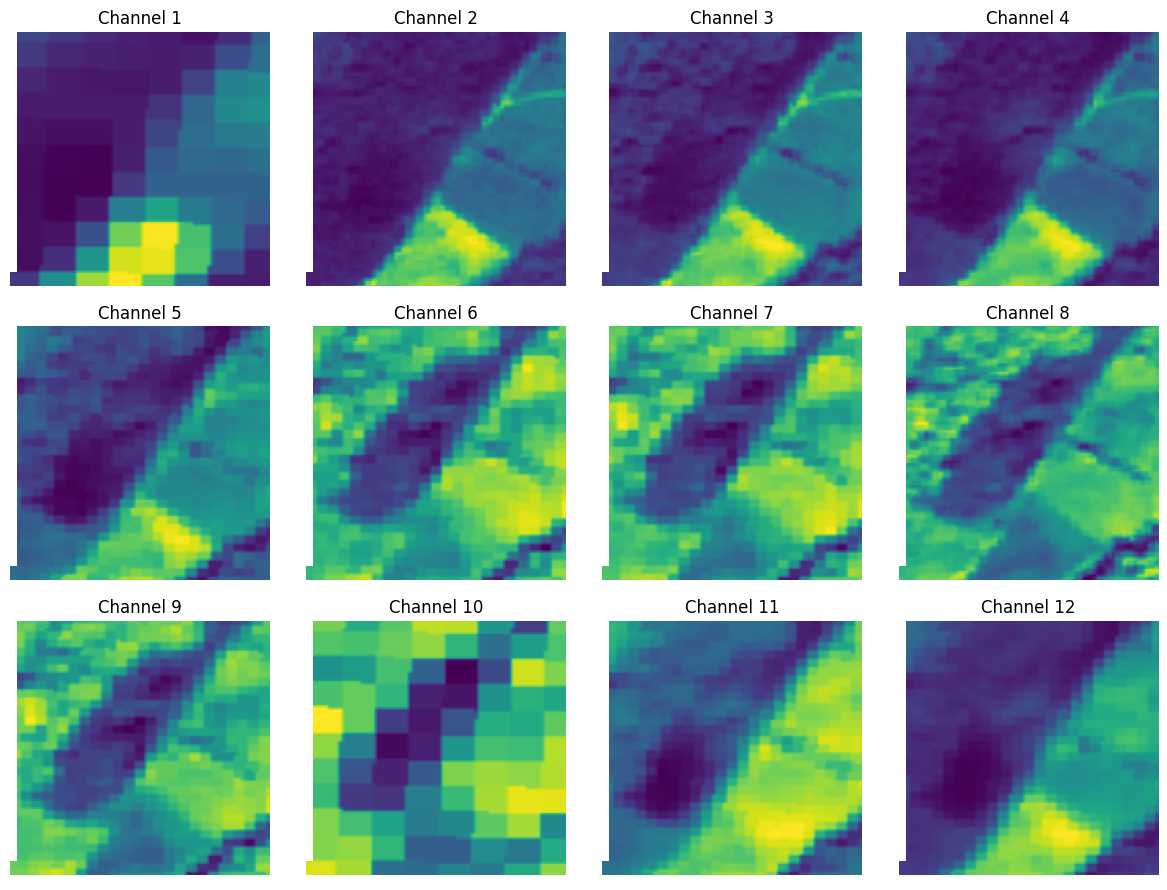

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(12, 9))

for i in range(12):
    axes[i // 4, i % 4].imshow(X[10][..., [i]])
    axes[i // 4, i % 4].axis('off')
    axes[i // 4, i % 4].set_title(f'Channel {i+1}')

plt.tight_layout()
plt.show()

### 3 channels

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def preprocess(X, y):
    # Create an instance of MinMaxScaler
    scaler = MinMaxScaler()
    # Set non-zero values in y to 1
    y_binary = np.where(y != 0, 1, y)
    X = X[:][..., [3,2,1]]
    X[np.isnan(X)] = 0
    X.max()
    
    # Reshape X to 2D array if needed
#     X_reshaped = X.reshape(X.shape[0], -1)

    # Apply min-max scaling to X
#     X_scaled = scaler.fit_transform(X_reshaped)

    # Reshape X_scaled back to the original shape if needed
#     X_scaled = X_scaled.reshape(X.shape)

    return X, y_binary



In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

# Set up data augmentation
data_gen_args = dict(
    rotation_range=10,        # Random rotation between -10 and +10 degrees
    width_shift_range=0.1,    # Randomly shift width by 0.1
    height_shift_range=0.1,   # Randomly shift height by 0.1
    shear_range=0.2,          # Shear transformation with a range of 0.2
    zoom_range=0.2,           # Randomly zoom in/out with a range of 0.2
    horizontal_flip=True,     # Randomly flip images horizontally
    vertical_flip=True       # Randomly flip images vertically
)

# Create an instance of ImageDataGenerator for X data augmentation
image_data_generator = ImageDataGenerator(**data_gen_args)

# Create an instance of ImageDataGenerator for y_binary data augmentation
mask_data_generator = ImageDataGenerator(**data_gen_args)

# Apply the modification to X
X_old, y_old = X.copy(), y.copy()
X, y_binary = preprocess(X, y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Set the seed for reproducibility
seed = 42

# Generate augmented training data for X
X_train_augmented = image_data_generator.flow(X_train, batch_size=16, seed=seed)

# Generate augmented validation data for X
X_val_augmented = image_data_generator.flow(X_val, batch_size=16, seed=seed)

# Reshape y_train to include the channel dimension
y_train = np.expand_dims(y_train, axis=-1)

# Reshape y_val to include the channel dimension
y_val = np.expand_dims(y_val, axis=-1)

# Generate augmented training data for y_binary
y_train_augmented = mask_data_generator.flow(y_train, batch_size=16, seed=seed)

# Generate augmented validation data for y_binary
y_val_augmented = mask_data_generator.flow(y_val, batch_size=16, seed=seed)

# Combine X and y generators into a single generator
train_generator = zip(X_train_augmented, y_train_augmented)
val_generator = zip(X_val_augmented, y_val_augmented)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import MeanIoU

# Define the callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

model = unet_model((128,128,3))
# model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the generators
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // 16,
                    epochs=100,
                    validation_data=val_generator,
                    validation_steps=len(X_val) // 16,
                    callbacks=[early_stopping, reduce_lr, keras.callbacks.ModelCheckpoint("unet.h5", save_best_only=True)])

Epoch 1/100
7/7 [==============================] - 18s 360ms/step - loss: 0.7628 - accuracy: 0.7478 - val_loss: 0.5564 - val_accuracy: 0.8436 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 3s 316ms/step - loss: 0.5686 - accuracy: 0.8669 - val_loss: 0.5123 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 2s 380ms/step - loss: 0.4613 - accuracy: 0.8692 - val_loss: 0.4527 - val_accuracy: 0.8190 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 2s 308ms/step - loss: 0.3810 - accuracy: 0.8688 - val_loss: 0.4401 - val_accuracy: 0.8201 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 2s 317ms/step - loss: 0.3741 - accuracy: 0.8638 - val_loss: 0.4044 - val_accuracy: 0.8402 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 1s 145ms/step - loss: 0.3803 - accuracy: 0.8520 - val_loss: 0.4244 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 4s 651ms/step - loss: 0.

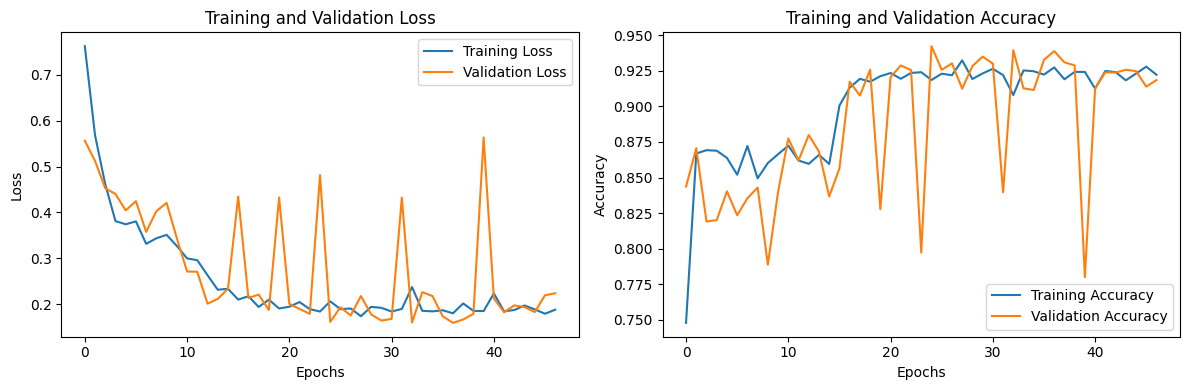

In [18]:
import matplotlib.pyplot as plt

# Get the history data
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot training and validation loss
axs[0].plot(train_loss, label='Training Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].legend()

# Plot training and validation accuracy
axs[1].plot(train_acc, label='Training Accuracy')
axs[1].plot(val_acc, label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


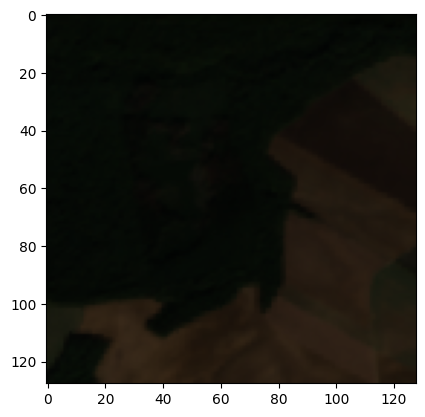

In [19]:
plt.imshow(X_val[10])

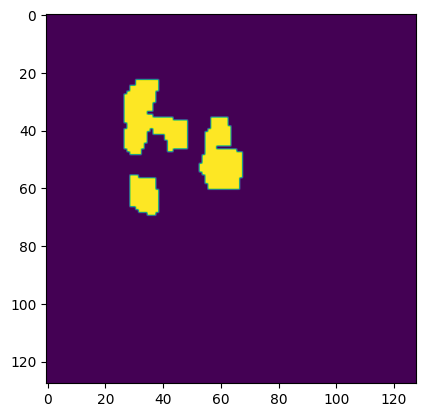

In [20]:
plt.imshow(y_val[10])

In [21]:
predictions = model.predict(X_val)

1/1 [==============================] - 3s 3s/step


In [22]:
predictions[10].max()

0.64245373

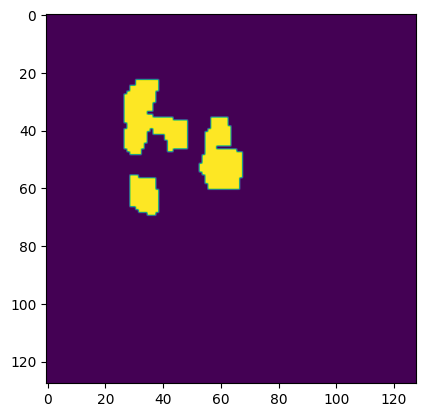

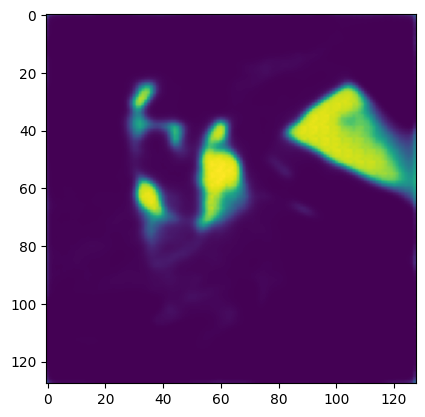

In [23]:
plt.imshow(y_val[10])
plt.show()
plt.imshow(predictions[10])

In [24]:
import numpy as np

# Initialize variables
best_threshold = 0
best_accuracy = 0

# Iterate over different threshold values
for threshold in np.arange(0, 1.01, 0.01):
    # Binarize the predictions
    binary_predictions = (predictions > threshold).astype(int)
    
    # Calculate accuracy
    accuracy = np.mean(binary_predictions == y_val)
    
    # Check if current threshold gives higher accuracy
    if accuracy > best_accuracy:
        best_threshold = threshold
        best_accuracy = accuracy

print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)

Best Threshold: 0.49
Best Accuracy: 0.94012451171875


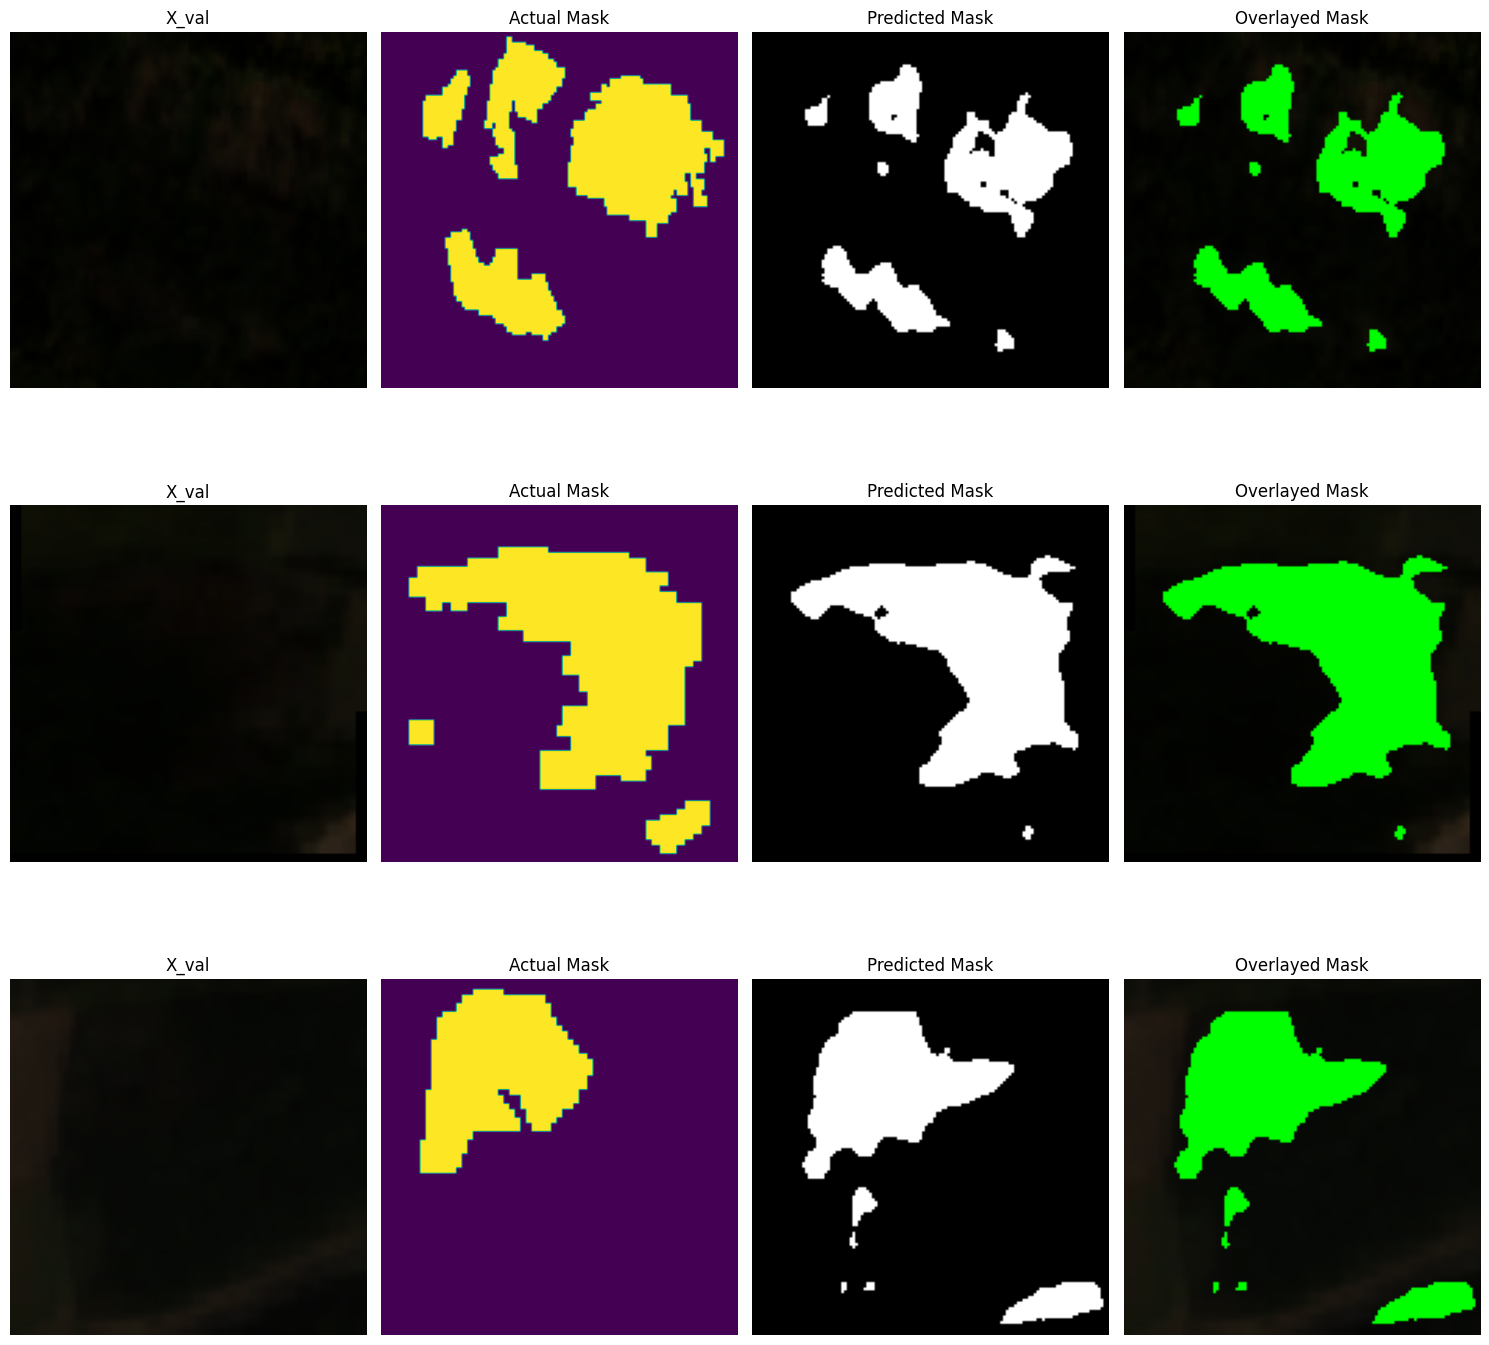

In [25]:
import matplotlib.pyplot as plt

# Set the threshold value for binarization
threshold = best_threshold

# Binarize the predictions
binary_predictions = (predictions > threshold).astype(int)

# Select random samples from validation set
sample_indices = np.random.choice(len(X_val), size=3, replace=False)
sample_images = X_val[sample_indices]
sample_masks = y_val[sample_indices]
sample_predictions = binary_predictions[sample_indices]

# Plot images with predicted and actual masks
fig, axes = plt.subplots(3, 4, figsize=(15, 15))

for i, ax in enumerate(axes):
    ax[0].imshow(sample_images[i])
    ax[0].set_title('X_val')
    ax[0].axis('off')

    ax[1].imshow(sample_masks[i])
    ax[1].set_title('Actual Mask')
    ax[1].axis('off')

    ax[2].imshow(sample_predictions[i], cmap='gray')
    ax[2].set_title('Predicted Mask')
    ax[2].axis('off')

    # Binarized overlayed mask
    overlay = sample_images[i].copy()
    overlay[np.squeeze(sample_predictions[i], axis=-1) == 1] = [0, 255, 0]
    ax[3].imshow(overlay)
    ax[3].set_title('Overlayed Mask')
    ax[3].axis('off')

plt.tight_layout()
plt.savefig('val_results.png')
plt.show()

In [69]:
# Розміри зображення після зміни розміру
img_height = 128
img_width = 128

# Список файлів TF-IDF
file_list_X = []

mask_paths = os.listdir('/kaggle/input/eripthack-data/damage_masks/')

# Прочитати всі файли TF-IDF за жовтень 2018 року
for root, dirs, files in os.walk(tfidf_folder):
    for file in files:
        if file.endswith('.tif') and '2018-10' in file:
            folder = root.split('/')[-1]
            mask_path = f'geojson_{folder}_mask.tif'
            if mask_path not in mask_paths:
                file_path = os.path.join(root, file)
                file_list_X.append(file_path)

# Зчитати файли TF-IDF у змінну X
X = np.concatenate([resize(tifffile.imread(file_path), (img_height, img_width))[None] for file_path in file_list_X], axis=0)

# Вивести розмірність масивів X та y
print("Розмірність X:", X.shape)

/opt/conda/lib/python3.10/site-packages/skimage/transform/_warps.py:674: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/opt/conda/lib/python3.10/site-packages/skimage/transform/_warps.py:678: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


Розмірність X: (147, 128, 128, 12)


In [70]:
file_list_X[0]

'/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/81/geojson_81-2018-10-11-2018-10-21-S2.tif'

In [78]:
X, y = preprocess(X, y)

In [79]:
predictions = model.predict(X)

5/5 [==============================] - 0s 57ms/step


In [80]:
binary_predictions = (predictions > threshold).astype(int)

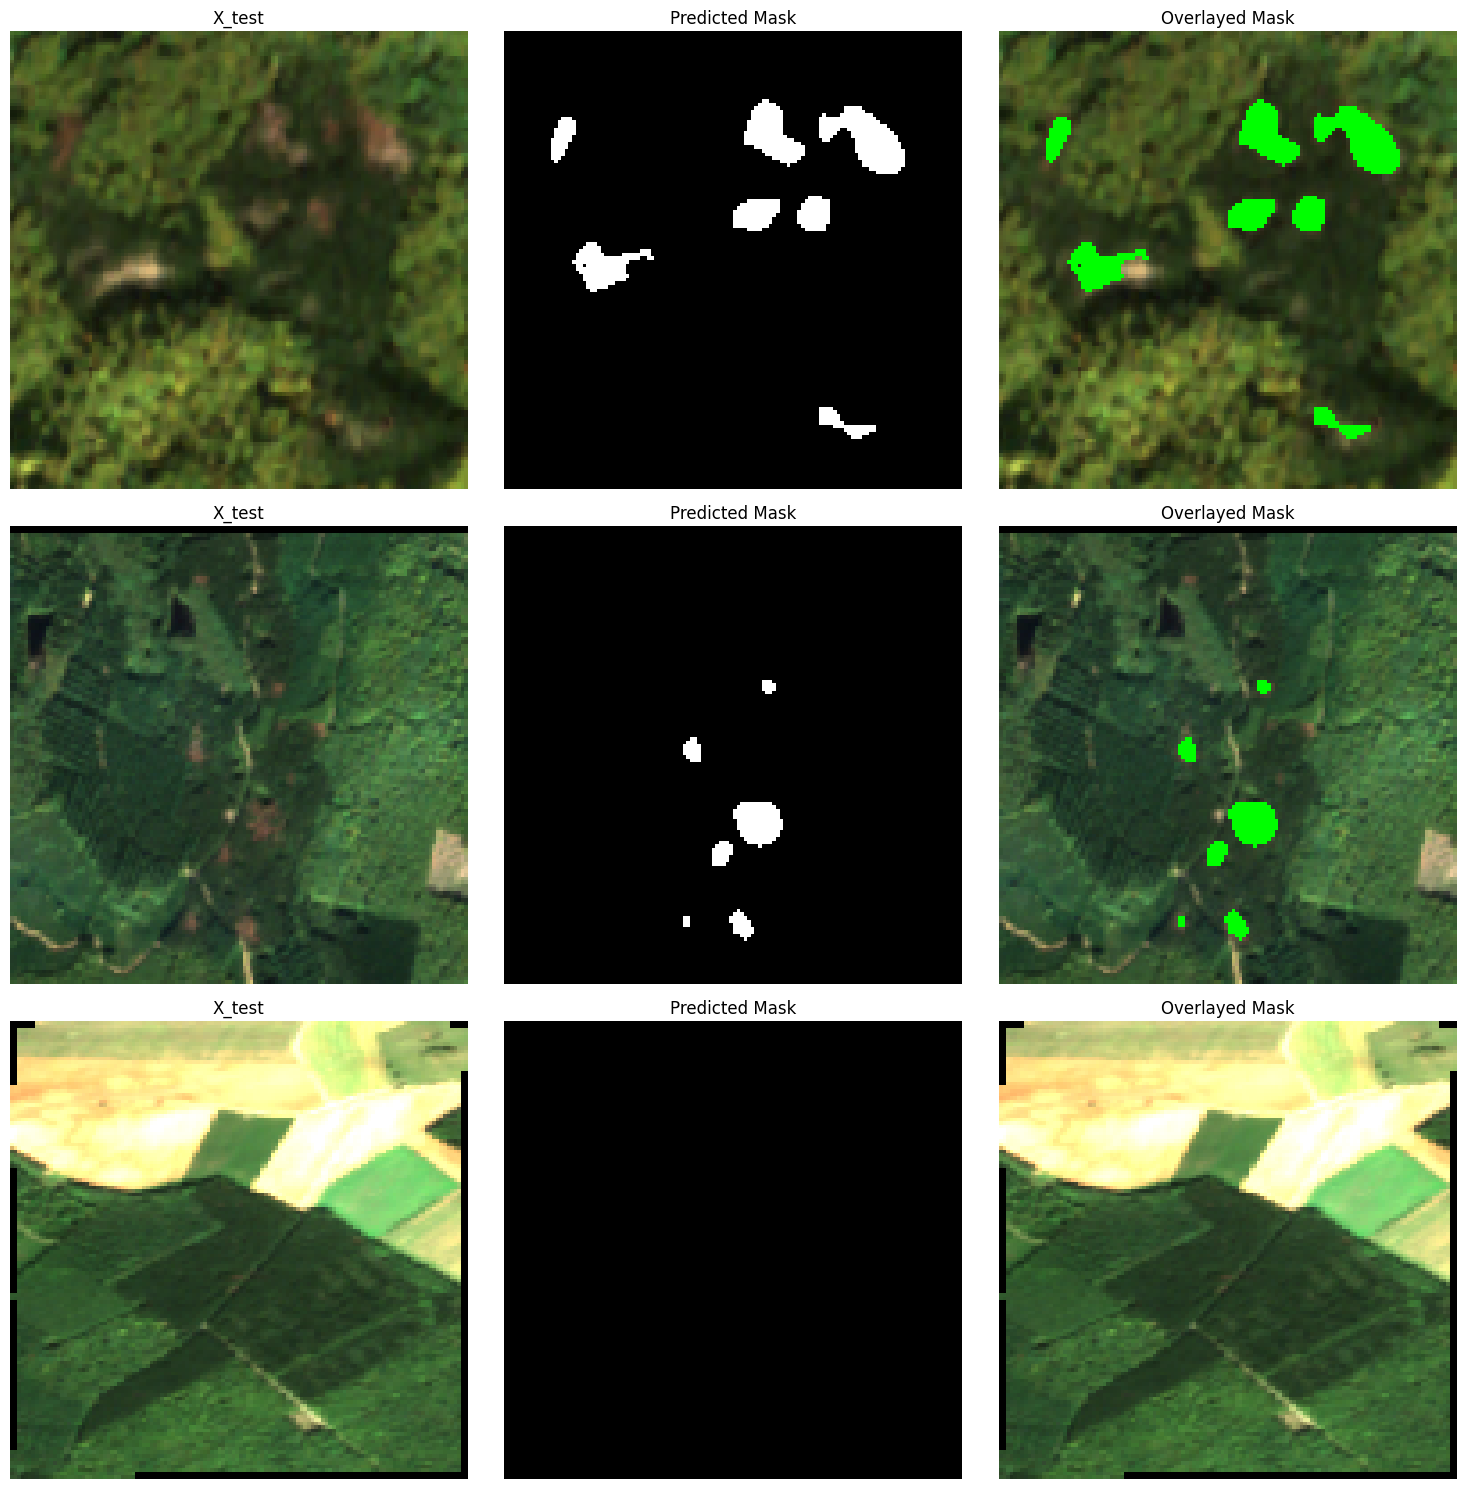

In [100]:
import matplotlib.pyplot as plt

# Set the threshold value for binarization
threshold = best_threshold

# Binarize the predictions
binary_predictions = (predictions > threshold).astype(int)

# Select random samples from validation set
sample_indices = np.random.choice(len(X), size=3, replace=False)
sample_images = X[sample_indices]
sample_predictions = binary_predictions[sample_indices]

# Plot images with predicted and actual masks
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axes):
    ax[0].imshow(sample_images[i]*10)
    ax[0].set_title('X_test')
    ax[0].axis('off')


    ax[1].imshow(sample_predictions[i], cmap='gray')
    ax[1].set_title('Predicted Mask')
    ax[1].axis('off')

    # Binarized overlayed mask
    overlay = sample_images[i].copy() * 10
    overlay[np.squeeze(sample_predictions[i], axis=-1) == 1] = [0, 255, 0]
    ax[2].imshow(overlay)
    ax[2].set_title('Overlayed Mask')
    ax[2].axis('off')

plt.tight_layout()
plt.savefig('test_plot.png')
plt.show()

In [31]:
import numpy as np

# Create a list to store reshaped binary predictions
reshaped_predictions = []
orig_images = []
# Reshape binary predictions
for i in range(len(file_list_X)):
    img = tifffile.imread(file_list_X[i])
    orig_images.append(img)
    # Load the corresponding image shape from file_list_X
    image_shape = img.shape[0], img.shape[1], 1
    
    # Reshape the binary prediction to match the image shape
    reshaped_prediction = np.resize(binary_predictions[i], image_shape)
    
    # Append the reshaped prediction to the list
    reshaped_predictions.append(reshaped_prediction)


In [32]:
# Check if shapes of masks correspond to shapes of images
for image, mask in zip(reshaped_predictions, orig_images):
    image_shape = image.shape[:-1]
    mask_shape = mask.shape[:-1]
    if image_shape != mask_shape:
        print("Image shape:", image_shape)
        print("Mask shape:", mask_shape)
        print("Shape mismatch for an image and its mask!")

In [33]:
os.mkdir('/kaggle/working/results/')

In [95]:
import os
import numpy as np
import tifffile
import rasterio

# Функція для копіювання геоприв'язки з одного зображення до іншого
def copy_geolocation(source_image_path, destination_image_path):
    # Отримуємо геоприв'язку з початкового зображення
    source_transform, source_crs = read_geolocation_tiff(source_image_path)

    # Оновлюємо геоприв'язку у призначеному зображенні
    update_geolocation_tiff(destination_image_path, source_transform, source_crs)

# Функція для читання геоприв'язки з Tiff-файлу
def read_geolocation_tiff(tiff_path):
    with rasterio.open(tiff_path) as dataset:
        # Отримуємо геотрансформацію та систему координат
        transform = dataset.transform
        crs = dataset.crs

    return transform, crs

# Функція для оновлення геоприв'язки у Tiff-файлі
def update_geolocation_tiff(tiff_path, transform, crs):
    with rasterio.open(tiff_path, "r+", driver="GTiff") as dataset:
        # Оновлюємо геотрансформацію та систему координат
        dataset.transform = transform
        dataset.crs = crs

# Отримуємо список оригінальних зображень
orig_images = []

# Reshape binary predictions
for i in range(len(file_list_X)):
    img = tifffile.imread(file_list_X[i])
    orig_images.append(img)
    num = file_list_X[i].split('/')[-2]
    date = file_list_X[i].split('/')[-1].split('_')[1].split('.')[0]
    
    # Load the corresponding image shape from file_list_X
    image_shape = (img.shape[0], img.shape[1], 1)
    
    # Reshape the binary prediction to match the image shape
    reshaped_prediction = resize(binary_predictions[i], (image_shape))
    reshaped_prediction = np.where(reshaped_prediction != 0, 1,reshaped_prediction)

    # Append the reshaped prediction to the list
    reshaped_predictions.append(reshaped_prediction)
    

    # Save the reshaped prediction as an image in the "results" folder
    save_path = os.path.join("/kaggle/working/results", f"geojson_{num}_{date}_mask.tif")
    tifffile.imwrite(save_path, reshaped_prediction)
    
    # Copy geolocation from original image to the reshaped prediction
    copy_geolocation(file_list_X[i], save_path)


# Predict

In [39]:
forest_types = tifffile.imread('/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/0/geojson_0_forest_type_2018.tif')

In [40]:
# Create the first binary mask where 0 values remain the same and non-zero values become 1
first_binary_mask = np.where(forest_types == 1, 1, 0)

# Create the second binary mask where 1 values remain the same and non-1 values become 0
second_binary_mask = np.where(forest_types == 2, 1, 0)

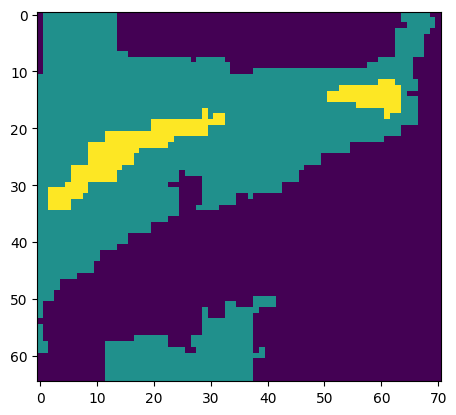

In [41]:
plt.imshow(forest_types)

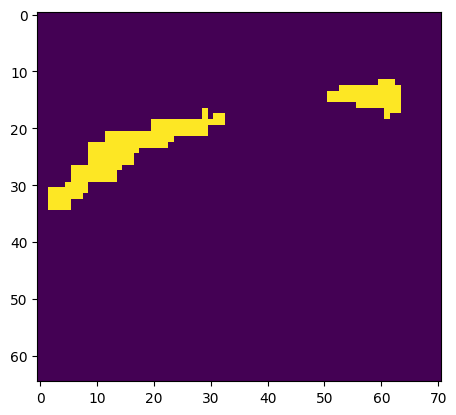

In [42]:
plt.imshow(second_binary_mask)

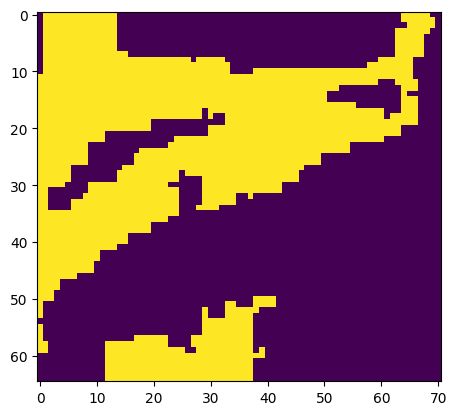

In [43]:
plt.imshow(first_binary_mask)

In [ ]:
import os
import pandas as pd
import tifffile

# Set the threshold value for binarization
threshold = best_threshold
path = '/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton'
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Folder", "File", "Masked Pixels Percentage"])

# Iterate through directories
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        files = []  # Create an empty list to store the file paths
        
        # Iterate through TIFF files in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            
            if file.endswith(".tif"):
                # Append the file path to the list
                files.append(file_path)
                
        img_shapes = []
        resized_images = []
        forest_map = ''
        forest_one = ''
        forest_two = ''
        # Resize images to a consistent size
        for file_path in files:
            img = tifffile.imread(file_path)
            img_shape = img.shape
            
            if 'forest_type' in file_path:
                forest_map = img
                
                # Create the first binary mask where 0 values remain the same and non-zero values become 1
                forest_one = np.where(img == 1, 1, 0)

                # Create the second binary mask where 1 values remain the same and non-1 values become 0
                forest_two = np.where(img == 2, 1, 0)
            
            resized_img = resize(img, (img_height, img_width))
            if resized_img.shape[-1] != 128:
                resized_images.append(resized_img)
                img_shapes.append(img_shape)

                

        # Convert the list of resized images to a numpy array
        X = np.stack(resized_images)
        
        X, y = preprocess(X, y)
        
        # Make predictions
        predictions = model.predict(X, verbose=0)
        # Binarize the predictions
        binary_predictions = (predictions > best_threshold).astype(int)
        for i, binary_prediction in enumerate(binary_predictions):
            # Resize the binary prediction to match the shape of the original image
            resized_binary_prediction = resize(binary_prediction, (img_shapes[i][0], img_shapes[i][1]))
            resized_binary_prediction = np.where(resized_binary_prediction != 0, 1., resized_binary_prediction)
            
            reshaped_resized_binary_prediction = resized_binary_prediction.reshape(forest_one.shape)
            overlay_forest_one = np.logical_and(forest_one, reshaped_resized_binary_prediction).astype(np.uint8).sum()
            forest_one_pixels_percentage = (overlay_forest_one / forest_one.sum()) * 100
            
            overlay_forest_two = np.logical_and(forest_two, reshaped_resized_binary_prediction).astype(np.uint8).sum()
            forest_two_pixels_percentage = (overlay_forest_two / forest_two.sum()) * 100

            overlay_two_forests = np.logical_and(forest_map, reshaped_resized_binary_prediction).astype(np.uint8).sum()
            two_forests_pixels_percentage = (overlay_two_forests / (forest_one.sum() + forest_two.sum())) * 100
            
            masked_pixels_percentage = (resized_binary_prediction.sum() / resized_binary_prediction.size) * 100
            
            # Append the results to the DataFrame
            results_df = results_df.append({
                "Folder": folder,
                "File": os.path.basename(files[i]),
                "Masked Pixels Percentage": masked_pixels_percentage,
                "Masked Pixels": resized_binary_prediction.sum(),
                "Hardwood Forest Damage Persantage":  forest_one_pixels_percentage,
                "Pine Forest Damage Persantage":  forest_two_pixels_percentage,
                "All Damage Persantage":  two_forests_pixels_percentage,
                "Hardwood Forest Damage": overlay_forest_one,
                "Pine Forest Damage":overlay_forest_two,
                'All Damage': overlay_two_forests,
            }, ignore_index=True)

In [102]:
results_df

Folder                                     File  \
0         7   geojson_7-2018-05-06-2018-05-11-S2.tif   
1         7   geojson_7-2017-04-21-2017-05-01-S2.tif   
2         7   geojson_7-2020-05-21-2020-06-01-S2.tif   
3         7   geojson_7-2018-09-21-2018-10-01-S2.tif   
4         7   geojson_7-2019-07-11-2019-07-21-S2.tif   
...     ...                                      ...   
6183     93  geojson_93-2019-04-11-2019-04-21-S2.tif   
6184     93  geojson_93-2019-12-01-2019-12-11-S2.tif   
6185     93  geojson_93-2019-03-11-2019-03-21-S2.tif   
6186     93  geojson_93-2018-08-01-2018-08-11-S2.tif   
6187     93  geojson_93-2018-03-21-2018-04-01-S2.tif   

      Masked Pixels Percentage  Masked Pixels  \
0                     6.177062          307.0   
1                    18.470825          918.0   
2                     1.710262           85.0   
3                    29.336016         1458.0   
4                    16.659960          828.0   
...                        ...            ...   
6183                 63.500000         3048.0   
6184                 64.437500         3093.0   
6185                  4.270833          205.0   
6186                 46.625000         2238.0   
6187                 21.666667         1040.0   

      Hardwood Forest Damage Persantage  Pine Forest Damage Persantage  \
0                              3.174603                       6.255161   
1                             34.126984                      18.063584   
2                              0.000000                       1.754748   
3                              8.730159                      29.872007   
4                              3.174603                      17.010735   
...                                 ...                            ...   
6183                          88.326848                      38.711019   
6184                          93.607560                      46.528067   
6185                           0.000000                       8.523909   
6186                          95.330739                      12.848233   
6187                          41.356309                      10.228690   

      All Damage Persantage  Hardwood Forest Damage  Pine Forest Damage  \
0                  6.177062                     4.0               303.0   
1                 18.470825                    43.0               875.0   
2                  1.710262                     0.0                85.0   
3                 29.336016                    11.0              1447.0   
4                 16.659960                     4.0               824.0   
...                     ...                     ...                 ...   
6183              59.942912                  1589.0               931.0   
6184              66.674596                  1684.0              1119.0   
6185               4.876308                     0.0               205.0   
6186              48.144624                  1715.0               309.0   
6187              23.549001                   744.0               246.0   

      All Damage  
0          307.0  
1          918.0  
2           85.0  
3         1458.0  
4          828.0  
...          ...  
6183      2520.0  
6184      2803.0  
6185       205.0  
6186      2024.0  
6187       990.0  

[6188 rows x 10 columns]

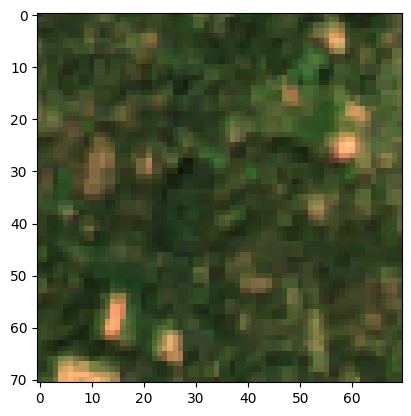

In [103]:
test_file = '/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/7/geojson_7-2017-04-21-2017-05-01-S2.tif'
img = tifffile.imread(test_file)
plt.imshow(img[..., [3,2,1]]*10)

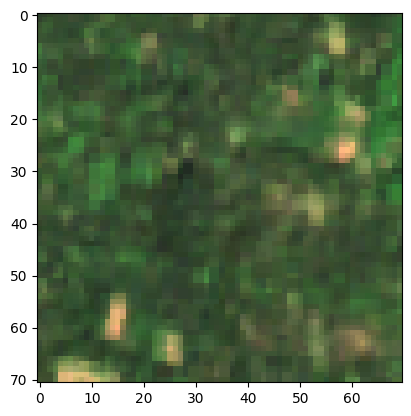

In [104]:
test_file = '/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/7/geojson_7-2018-05-06-2018-05-11-S2.tif'
img = tifffile.imread(test_file)
plt.imshow(img[..., [3,2,1]]*10)

In [105]:
results_df.to_csv('results.csv', index=False)

### EDA

In [106]:
df = results_df.copy()
df

Folder                                     File  \
0         7   geojson_7-2018-05-06-2018-05-11-S2.tif   
1         7   geojson_7-2017-04-21-2017-05-01-S2.tif   
2         7   geojson_7-2020-05-21-2020-06-01-S2.tif   
3         7   geojson_7-2018-09-21-2018-10-01-S2.tif   
4         7   geojson_7-2019-07-11-2019-07-21-S2.tif   
...     ...                                      ...   
6183     93  geojson_93-2019-04-11-2019-04-21-S2.tif   
6184     93  geojson_93-2019-12-01-2019-12-11-S2.tif   
6185     93  geojson_93-2019-03-11-2019-03-21-S2.tif   
6186     93  geojson_93-2018-08-01-2018-08-11-S2.tif   
6187     93  geojson_93-2018-03-21-2018-04-01-S2.tif   

      Masked Pixels Percentage  Masked Pixels  \
0                     6.177062          307.0   
1                    18.470825          918.0   
2                     1.710262           85.0   
3                    29.336016         1458.0   
4                    16.659960          828.0   
...                        ...            ...   
6183                 63.500000         3048.0   
6184                 64.437500         3093.0   
6185                  4.270833          205.0   
6186                 46.625000         2238.0   
6187                 21.666667         1040.0   

      Hardwood Forest Damage Persantage  Pine Forest Damage Persantage  \
0                              3.174603                       6.255161   
1                             34.126984                      18.063584   
2                              0.000000                       1.754748   
3                              8.730159                      29.872007   
4                              3.174603                      17.010735   
...                                 ...                            ...   
6183                          88.326848                      38.711019   
6184                          93.607560                      46.528067   
6185                           0.000000                       8.523909   
6186                          95.330739                      12.848233   
6187                          41.356309                      10.228690   

      All Damage Persantage  Hardwood Forest Damage  Pine Forest Damage  \
0                  6.177062                     4.0               303.0   
1                 18.470825                    43.0               875.0   
2                  1.710262                     0.0                85.0   
3                 29.336016                    11.0              1447.0   
4                 16.659960                     4.0               824.0   
...                     ...                     ...                 ...   
6183              59.942912                  1589.0               931.0   
6184              66.674596                  1684.0              1119.0   
6185               4.876308                     0.0               205.0   
6186              48.144624                  1715.0               309.0   
6187              23.549001                   744.0               246.0   

      All Damage  
0          307.0  
1          918.0  
2           85.0  
3         1458.0  
4          828.0  
...          ...  
6183      2520.0  
6184      2803.0  
6185       205.0  
6186      2024.0  
6187       990.0  

[6188 rows x 10 columns]

In [107]:
import pandas as pd
import re

# Extract start date and finish date using regular expressions
date_pattern = r"\d{4}-\d{2}-\d{2}"
df['Start Date'] = df["File"].str.replace("geojson_", "").str.replace("-S2.tif", "").str[2:].str.lstrip("-").str[:10]
df['End Date'] = df["File"].str.replace("geojson_", "").str.replace("-S2.tif", "").str[2:].str.lstrip("-").str[11:]

df

/tmp/ipykernel_31/3923944848.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Start Date'] = df["File"].str.replace("geojson_", "").str.replace("-S2.tif", "").str[2:].str.lstrip("-").str[:10]
/tmp/ipykernel_31/3923944848.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['End Date'] = df["File"].str.replace("geojson_", "").str.replace("-S2.tif", "").str[2:].str.lstrip("-").str[11:]


Folder                                     File  \
0         7   geojson_7-2018-05-06-2018-05-11-S2.tif   
1         7   geojson_7-2017-04-21-2017-05-01-S2.tif   
2         7   geojson_7-2020-05-21-2020-06-01-S2.tif   
3         7   geojson_7-2018-09-21-2018-10-01-S2.tif   
4         7   geojson_7-2019-07-11-2019-07-21-S2.tif   
...     ...                                      ...   
6183     93  geojson_93-2019-04-11-2019-04-21-S2.tif   
6184     93  geojson_93-2019-12-01-2019-12-11-S2.tif   
6185     93  geojson_93-2019-03-11-2019-03-21-S2.tif   
6186     93  geojson_93-2018-08-01-2018-08-11-S2.tif   
6187     93  geojson_93-2018-03-21-2018-04-01-S2.tif   

      Masked Pixels Percentage  Masked Pixels  \
0                     6.177062          307.0   
1                    18.470825          918.0   
2                     1.710262           85.0   
3                    29.336016         1458.0   
4                    16.659960          828.0   
...                        ...            ...   
6183                 63.500000         3048.0   
6184                 64.437500         3093.0   
6185                  4.270833          205.0   
6186                 46.625000         2238.0   
6187                 21.666667         1040.0   

      Hardwood Forest Damage Persantage  Pine Forest Damage Persantage  \
0                              3.174603                       6.255161   
1                             34.126984                      18.063584   
2                              0.000000                       1.754748   
3                              8.730159                      29.872007   
4                              3.174603                      17.010735   
...                                 ...                            ...   
6183                          88.326848                      38.711019   
6184                          93.607560                      46.528067   
6185                           0.000000                       8.523909   
6186                          95.330739                      12.848233   
6187                          41.356309                      10.228690   

      All Damage Persantage  Hardwood Forest Damage  Pine Forest Damage  \
0                  6.177062                     4.0               303.0   
1                 18.470825                    43.0               875.0   
2                  1.710262                     0.0                85.0   
3                 29.336016                    11.0              1447.0   
4                 16.659960                     4.0               824.0   
...                     ...                     ...                 ...   
6183              59.942912                  1589.0               931.0   
6184              66.674596                  1684.0              1119.0   
6185               4.876308                     0.0               205.0   
6186              48.144624                  1715.0               309.0   
6187              23.549001                   744.0               246.0   

      All Damage  Start Date    End Date  
0          307.0  2018-05-06  2018-05-11  
1          918.0  2017-04-21  2017-05-01  
2           85.0  2020-05-21  2020-06-01  
3         1458.0  2018-09-21  2018-10-01  
4          828.0  2019-07-11  2019-07-21  
...          ...         ...         ...  
6183      2520.0  2019-04-11  2019-04-21  
6184      2803.0  2019-12-01  2019-12-11  
6185       205.0  2019-03-11  2019-03-21  
6186      2024.0  2018-08-01  2018-08-11  
6187       990.0  2018-03-21  2018-04-01  

[6188 rows x 12 columns]

In [110]:
df = df[df['Start Date'] != '_forest_ty']
df = df[df['Start Date'] != 'forest_typ']
df = df[df['Start Date'] != '_forest_typ']
df = df[df['End Date'] != '_forest_ty']
df = df[df['End Date'] != '_forest_typ']
df = df[df['End Date'] != '2017-09-01-S2(1).tif']


In [111]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

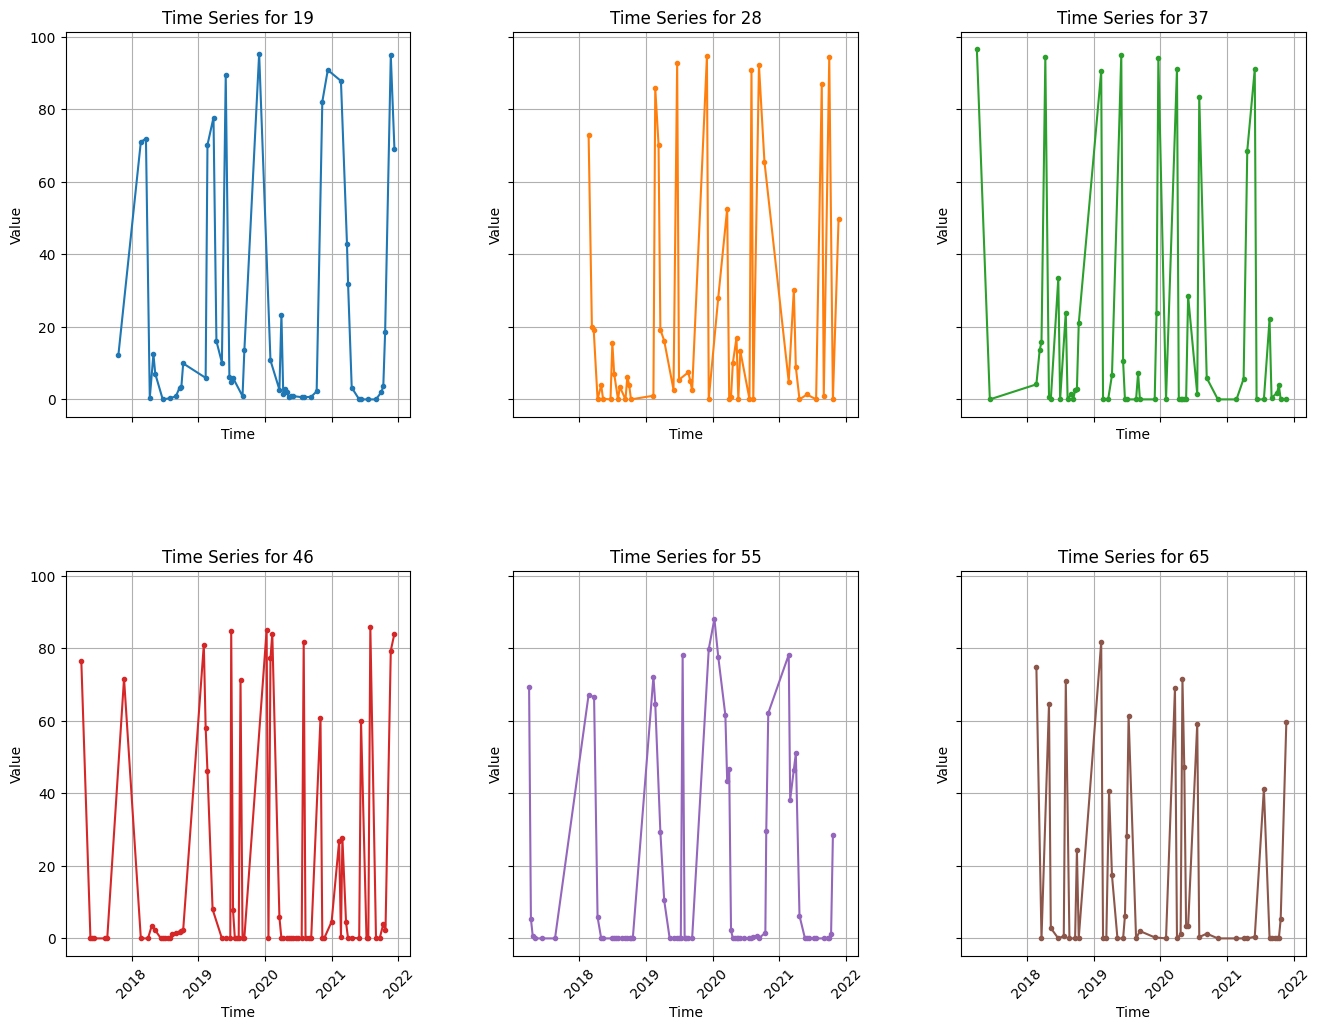

In [112]:
import matplotlib.pyplot as plt

# Set a custom color palette
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Sort the data by "Start Date"
sorted_df = df.sort_values('Start Date')

# Group the sorted data by "Folder"
grouped = sorted_df.groupby('Folder')

# Select specific folders by index
folder_indices = [10, 20, 30, 40, 50, 60]

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(16, 12), sharex=True, sharey=True)

# Iterate over the folder indices and plot the time series in the corresponding subplot
for i, index in enumerate(folder_indices):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Get the group for the current folder index
    folder, group = list(grouped)[index]
    
    # Plot the time series with point markers
    ax.plot(group['Start Date'], group['All Damage Persantage'], marker='o', markersize=3, color=colors[i], linestyle='-', label=folder)
    
    # Set the labels and title for each subplot
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title(f'Time Series for {folder}')
    
    # Add grid lines
    ax.grid(True)
    
    # Rotate x-axis labels by 45 degrees
    ax.tick_params(axis='x', rotation=45)
    
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Show the plot
plt.show()


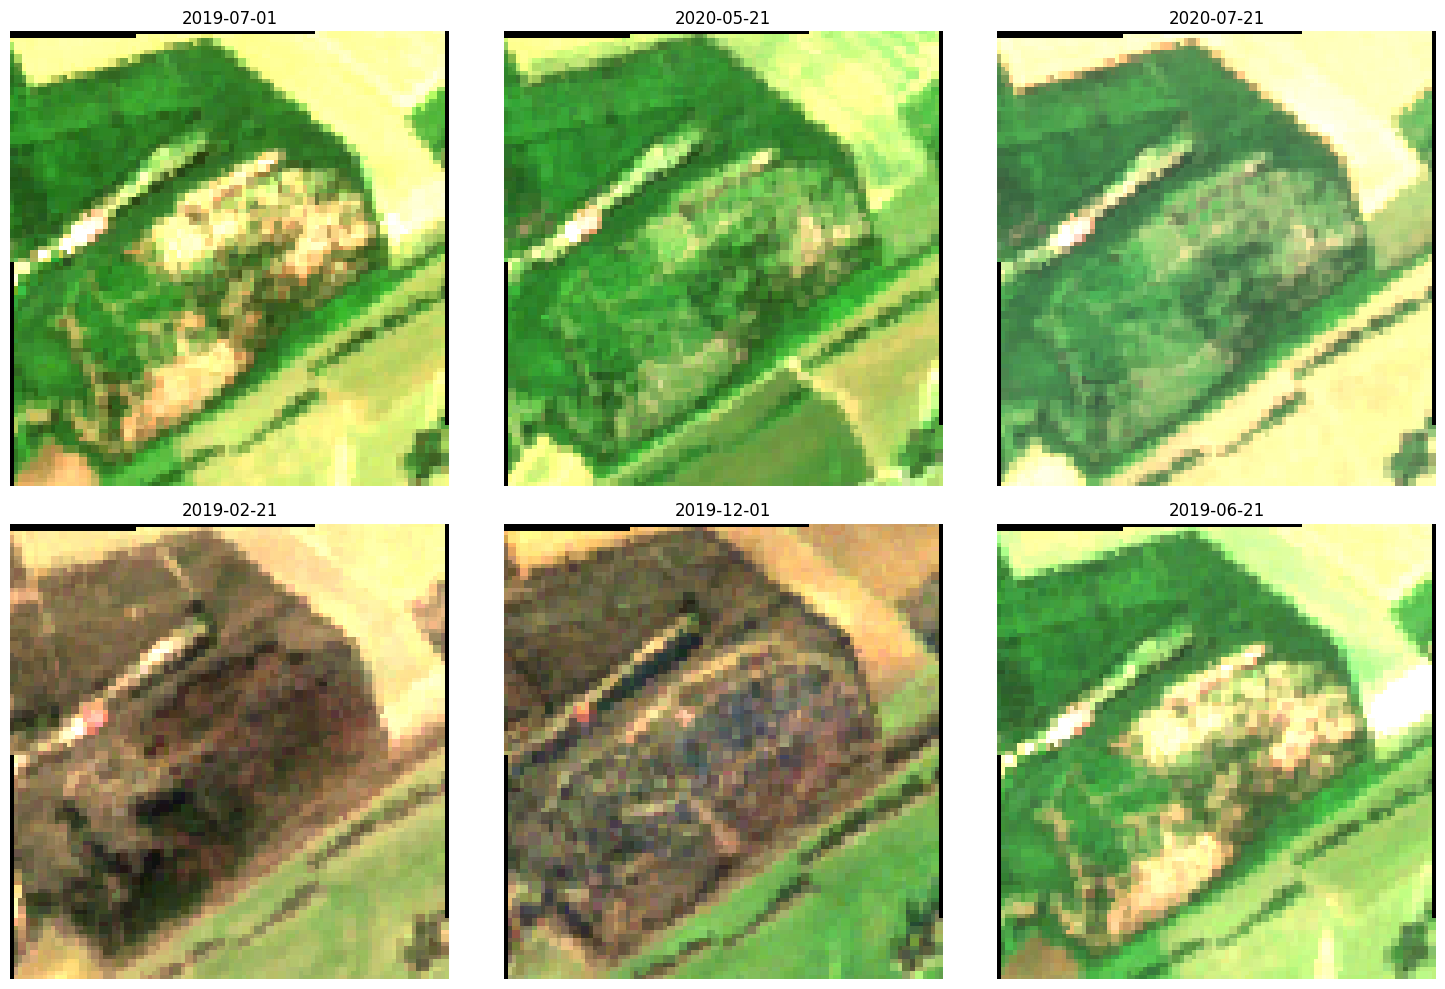

In [113]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the folders to plot
folders = ['28']

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the folders
for i, folder in enumerate(folders):
    # Folder path containing the images
    folder_path = f'/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/{folder}'
    
    # Filter the DataFrame for the current folder and All Damage Persantage less than 10
    filtered_less_than_10 = df[(df['Folder'] == folder) & (df['All Damage Persantage'] < 10)]
    # Get the filenames for the filtered records
    filenames_less_than_10 = filtered_less_than_10['File'].head(3).tolist()

    # Filter the DataFrame for the current folder and All Damage Persantage more than 70
    filtered_more_than_70 = df[(df['Folder'] == folder) & (df['All Damage Persantage'] > 70)]
    # Get the filenames for the filtered records
    filenames_more_than_70 = filtered_more_than_70['File'].head(3).tolist()

    # Plot the first three filenames with All Damage Percentage less than 10 in the first row
    for j, filename in enumerate(filenames_less_than_10):
        ax = axes[0, i*2+j]  # Use 2 instead of 3 as there are only 2 plots in the first row
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(np.datetime64(filtered_less_than_10['Start Date'].values[j],  'D'))
        ax.axis('off')

    # Plot the next three filenames with All Damage Percentage more than 70 in the second row
    for j, filename in enumerate(filenames_more_than_70):
        ax = axes[1, i*2+j]  # Use 2 instead of 3 as there are only 2 plots in the first row
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(np.datetime64(filtered_more_than_70['Start Date'].values[j],  'D'))
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

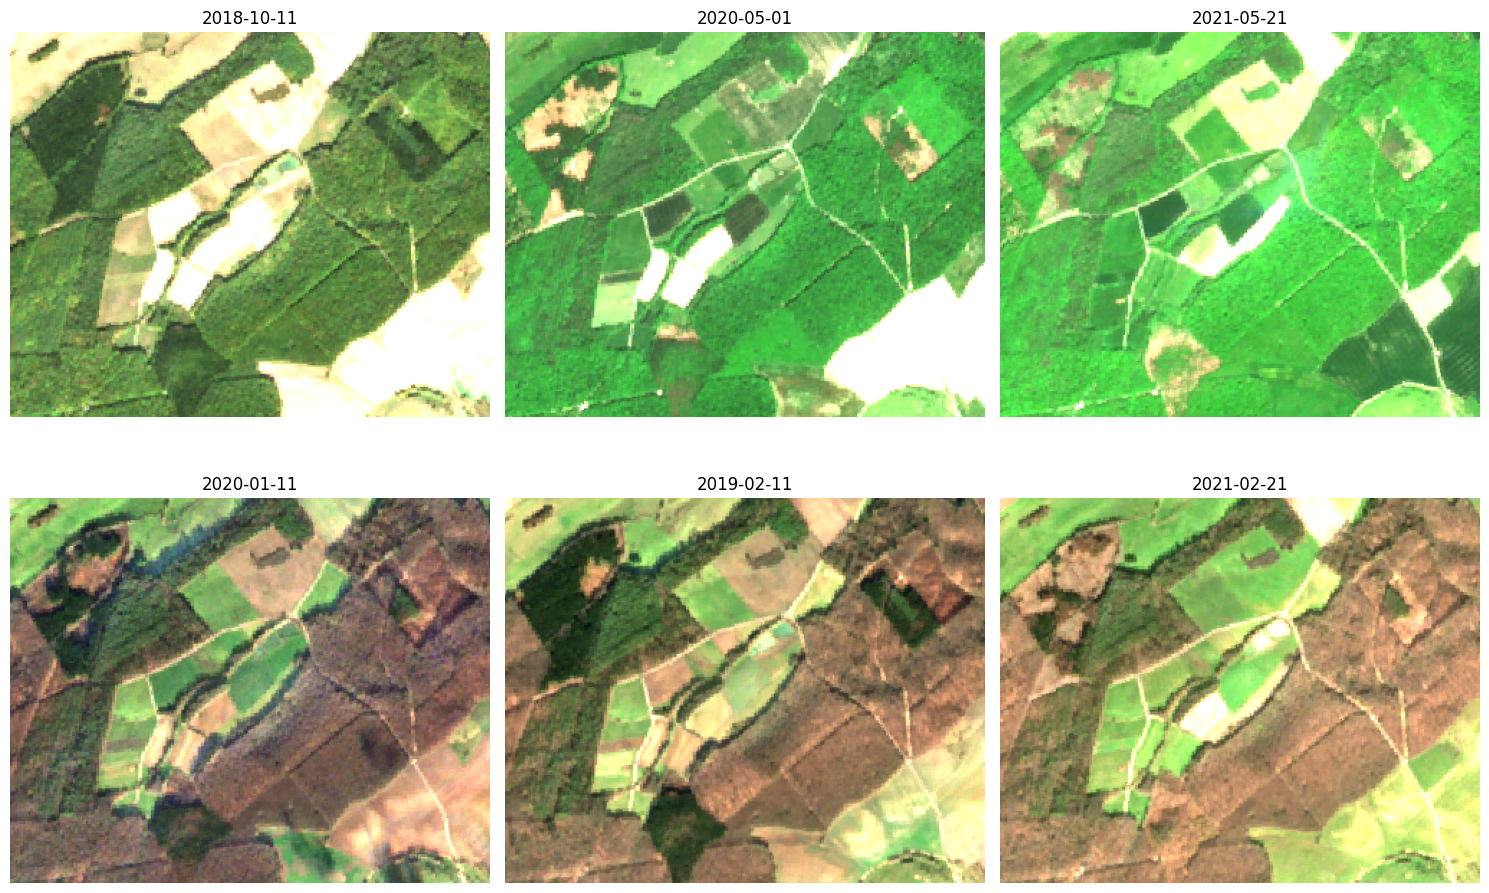

In [114]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the folders to plot
folders = ['55']

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the folders
for i, folder in enumerate(folders):
    # Folder path containing the images
    folder_path = f'/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/{folder}'
    
    # Filter the DataFrame for the current folder and All Damage Persantage less than 10
    filtered_less_than_10 = df[(df['Folder'] == folder) & (df['All Damage Persantage'] < 10)]
    # Get the filenames for the filtered records
    filenames_less_than_10 = filtered_less_than_10['File'].head(3).tolist()

    # Filter the DataFrame for the current folder and All Damage Persantage more than 70
    filtered_more_than_70 = df[(df['Folder'] == folder) & (df['All Damage Persantage'] > 70)]
    # Get the filenames for the filtered records
    filenames_more_than_70 = filtered_more_than_70['File'].head(3).tolist()

    # Plot the first three filenames with All Damage Percentage less than 10 in the first row
    for j, filename in enumerate(filenames_less_than_10):
        ax = axes[0, i*2+j]  # Use 2 instead of 3 as there are only 2 plots in the first row
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(np.datetime64(filtered_less_than_10['Start Date'].values[j],  'D'))
        ax.axis('off')

    # Plot the next three filenames with All Damage Percentage more than 70 in the second row
    for j, filename in enumerate(filenames_more_than_70):
        ax = axes[1, i*2+j]  # Use 2 instead of 3 as there are only 2 plots in the first row
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(np.datetime64(filtered_more_than_70['Start Date'].values[j],  'D'))
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


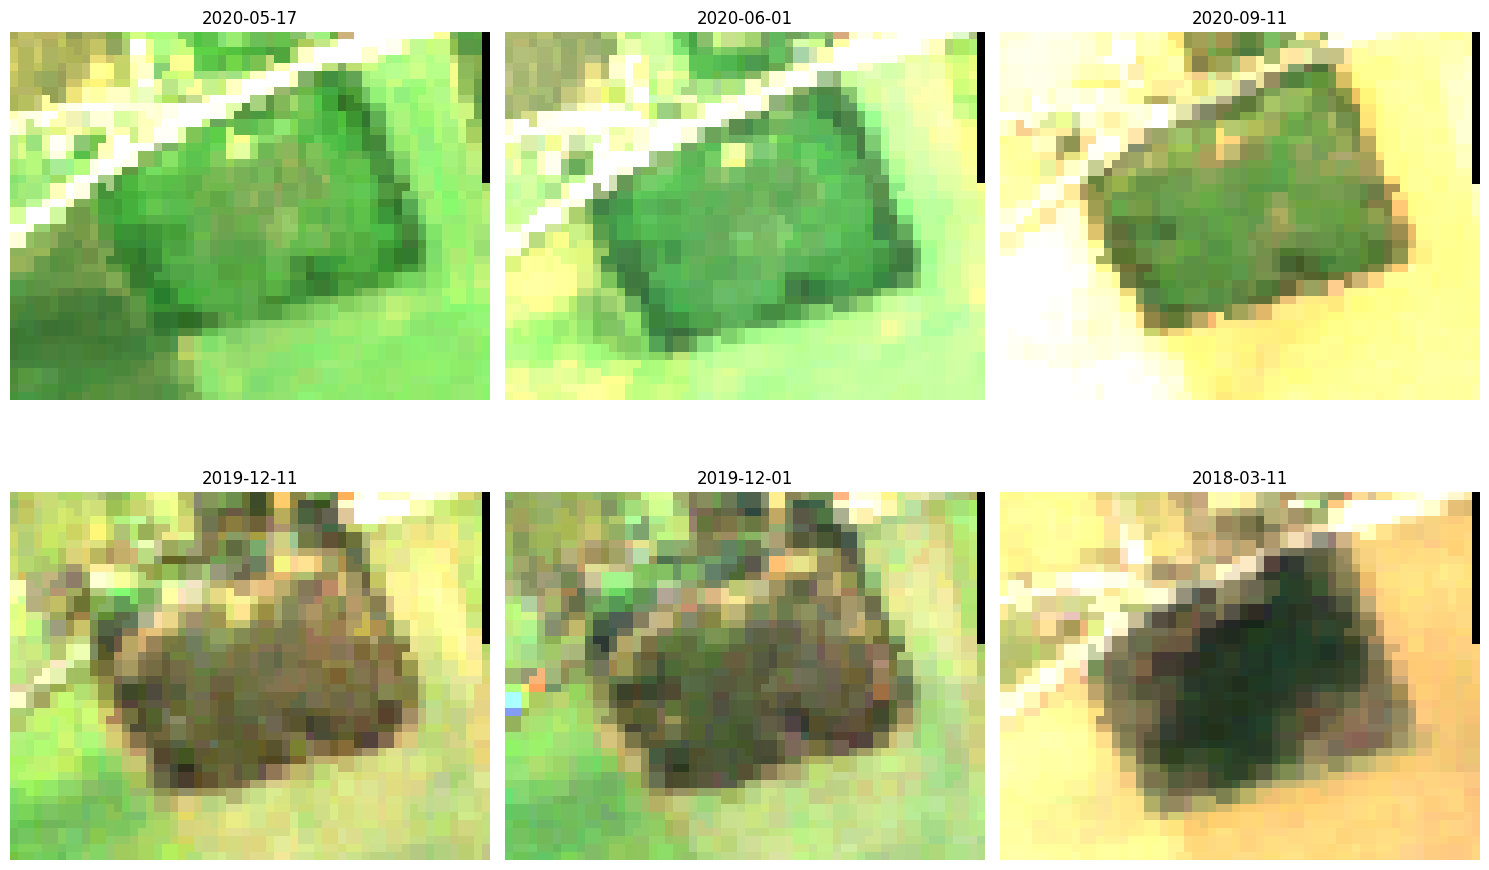

In [115]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the folders to plot
folders = ['5']

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the folders
for i, folder in enumerate(folders):
    # Folder path containing the images
    folder_path = f'/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/{folder}'
    
    # Filter the DataFrame for the current folder and All Damage Persantage less than 10
    filtered_less_than_10 = df[(df['Folder'] == folder) & (df['All Damage Persantage'] < 10)]
    # Get the filenames for the filtered records
    filenames_less_than_10 = filtered_less_than_10['File'].head(3).tolist()

    # Filter the DataFrame for the current folder and All Damage Persantage more than 70
    filtered_more_than_70 = df[(df['Folder'] == folder) & (df['All Damage Persantage'] > 70)]
    # Get the filenames for the filtered records
    filenames_more_than_70 = filtered_more_than_70['File'].head(3).tolist()

    # Plot the first three filenames with All Damage Percentage less than 10 in the first row
    for j, filename in enumerate(filenames_less_than_10):
        ax = axes[0, i*2+j]  # Use 2 instead of 3 as there are only 2 plots in the first row
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(np.datetime64(filtered_less_than_10['Start Date'].values[j],  'D'))
        ax.axis('off')

    # Plot the next three filenames with All Damage Percentage more than 70 in the second row
    for j, filename in enumerate(filenames_more_than_70):
        ax = axes[1, i*2+j]  # Use 2 instead of 3 as there are only 2 plots in the first row
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(np.datetime64(filtered_more_than_70['Start Date'].values[j],  'D'))
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [117]:
filtered_df_oct = df[(df['Start Date'].dt.month == 10) & (df['End Date'].dt.month == 10)]
filtered_df_oct

Folder                                     File  \
18        7   geojson_7-2020-10-11-2020-10-21-S2.tif   
22        7   geojson_7-2021-10-11-2021-10-21-S2.tif   
23        7   geojson_7-2018-10-11-2018-10-21-S2.tif   
27        7   geojson_7-2021-10-01-2021-10-11-S2.tif   
28        7   geojson_7-2018-10-01-2018-10-11-S2.tif   
...     ...                                      ...   
6116     73  geojson_73-2021-10-11-2021-10-21-S2.tif   
6125     73  geojson_73-2021-10-01-2021-10-11-S2.tif   
6133     73  geojson_73-2018-10-01-2018-10-11-S2.tif   
6154     93  geojson_93-2019-10-11-2019-10-21-S2.tif   
6167     93  geojson_93-2018-10-01-2018-10-11-S2.tif   

      Masked Pixels Percentage  Masked Pixels  \
18                   67.464789         3353.0   
22                   55.714286         2769.0   
23                    2.394366          119.0   
27                   30.181087         1500.0   
28                   25.150905         1250.0   
...                        ...            ...   
6116                  0.109571           17.0   
6125                  7.089913         1100.0   
6133                 64.576217        10019.0   
6154                  4.125000          198.0   
6167                 11.875000          570.0   

      Hardwood Forest Damage Persantage  Pine Forest Damage Persantage  \
18                            71.428571                      67.361685   
22                            38.095238                      56.172585   
23                             0.000000                       2.456647   
27                             8.730159                      30.739059   
28                            10.317460                      25.536746   
...                                 ...                            ...   
6116                           0.000000                       0.454789   
6125                          10.737045                       5.537721   
6133                          88.204882                      54.735152   
6154                           2.056698                       6.694387   
6167                           2.112285                      22.120582   

      All Damage Persantage  Hardwood Forest Damage  Pine Forest Damage  \
18                67.464789                    90.0              3263.0   
22                55.714286                    48.0              2721.0   
23                 2.394366                     0.0               119.0   
27                30.181087                    11.0              1489.0   
28                25.150905                    13.0              1237.0   
...                     ...                     ...                 ...   
6116               0.141020                     0.0                17.0   
6125               9.124844                   893.0               207.0   
6133              77.826628                  7336.0              2046.0   
6154               4.709800                    37.0               161.0   
6167              13.558516                    38.0               532.0   

      All Damage Start Date   End Date  
18        3353.0 2020-10-11 2020-10-21  
22        2769.0 2021-10-11 2021-10-21  
23         119.0 2018-10-11 2018-10-21  
27        1500.0 2021-10-01 2021-10-11  
28        1250.0 2018-10-01 2018-10-11  
...          ...        ...        ...  
6116        17.0 2021-10-11 2021-10-21  
6125      1100.0 2021-10-01 2021-10-11  
6133      9382.0 2018-10-01 2018-10-11  
6154       198.0 2019-10-11 2019-10-21  
6167       570.0 2018-10-01 2018-10-11  

[376 rows x 12 columns]

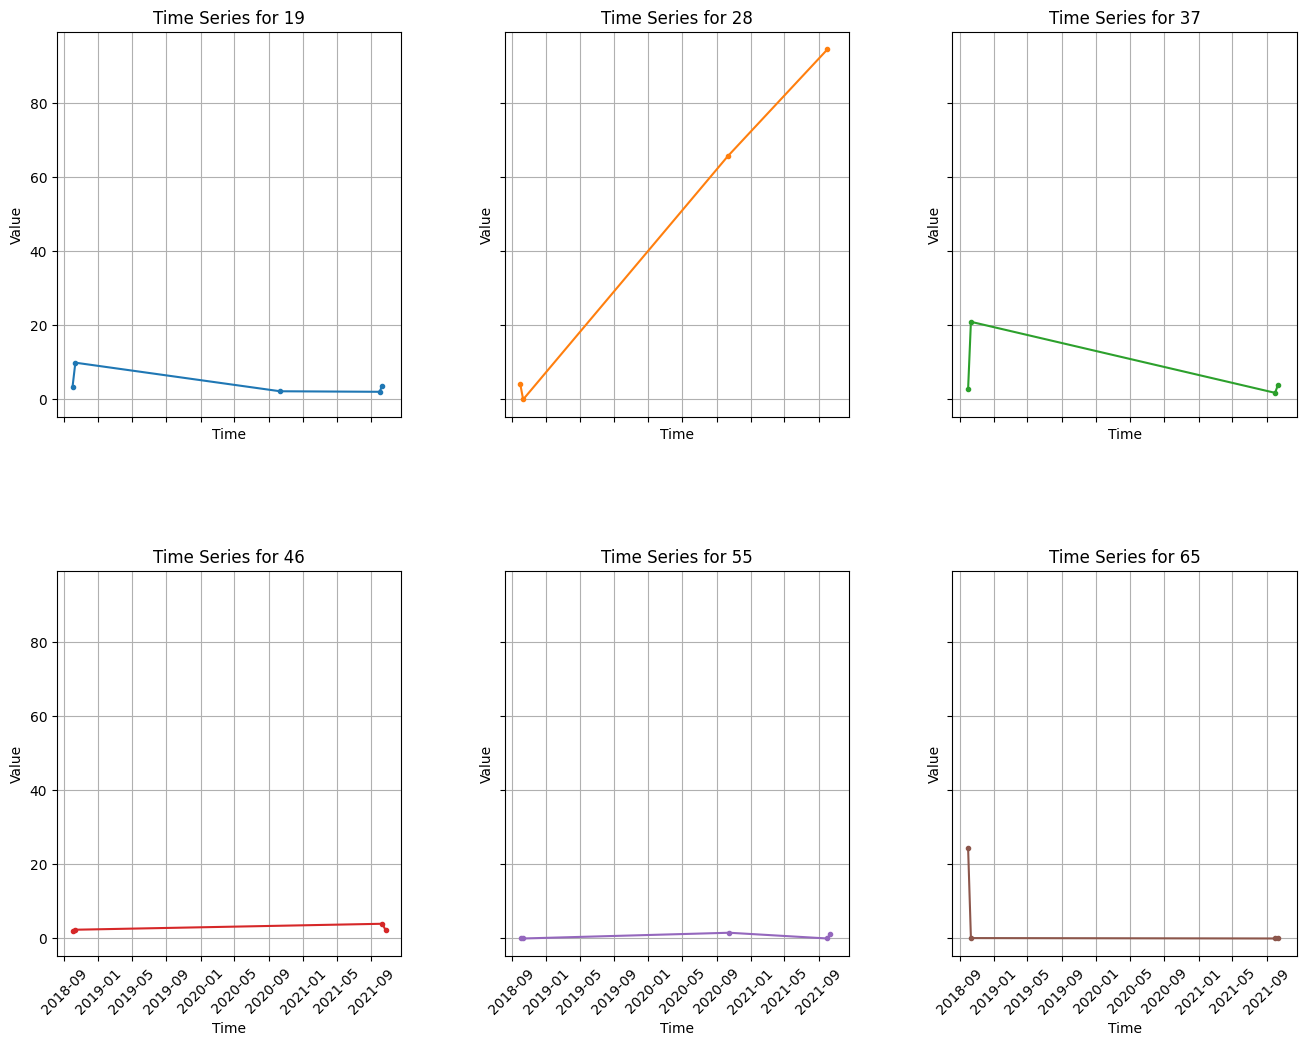

In [118]:
import matplotlib.pyplot as plt

# Set a custom color palette
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Sort the data by "Start Date"
sorted_df = filtered_df_oct.sort_values('Start Date')

# Group the sorted data by "Folder"
grouped = sorted_df.groupby('Folder')

# Select specific folders by index
folder_indices = [10, 20, 30, 40, 50, 60]

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(16, 12), sharex=True, sharey=True)

# Iterate over the folder indices and plot the time series in the corresponding subplot
for i, index in enumerate(folder_indices):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Get the group for the current folder index
    folder, group = list(grouped)[index]
    
    # Plot the time series with point markers
    ax.plot(group['Start Date'], group['All Damage Persantage'], marker='o', markersize=3, color=colors[i], linestyle='-', label=folder)
    
    # Set the labels and title for each subplot
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title(f'Time Series for {folder}')
    
    # Add grid lines
    ax.grid(True)
    
    # Rotate x-axis labels by 45 degrees
    ax.tick_params(axis='x', rotation=45)
    
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Show the plot
plt.show()


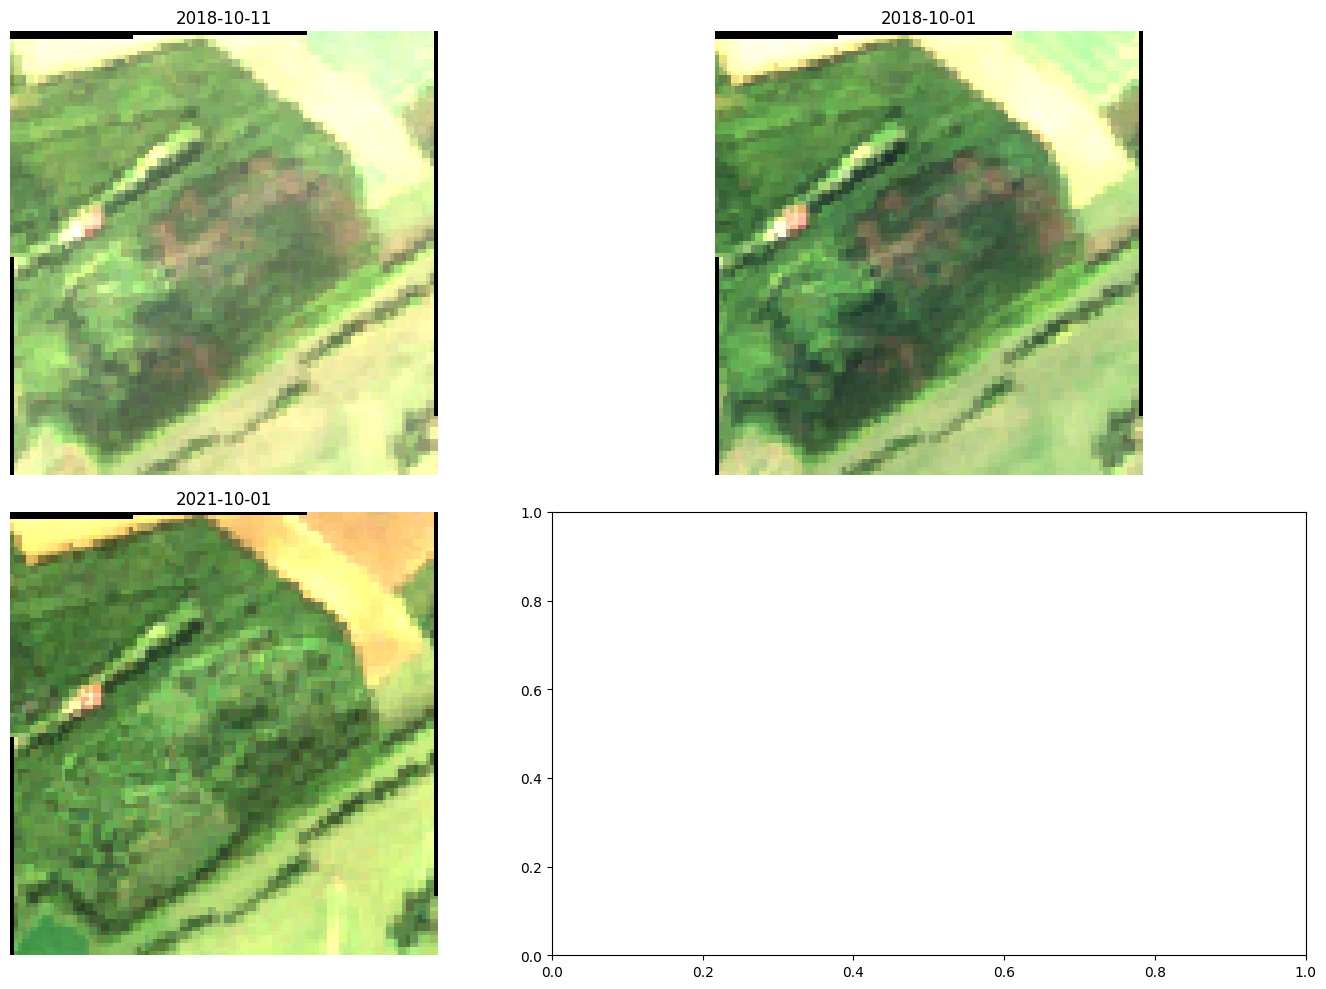

In [119]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the folders to plot
folders = ['28']

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over the folders
for i, folder in enumerate(folders):
    # Folder path containing the images
    folder_path = f'/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/{folder}'
    
    # Filter the DataFrame for the current folder and All Damage Persantage less than 10
    filtered_less_than_10 = filtered_df_oct[(filtered_df_oct['Folder'] == folder) & (filtered_df_oct['All Damage Persantage'] < 10)]
    # Get the filenames for the filtered records
    filenames_less_than_10 = filtered_less_than_10['File'].head(3).tolist()

    # Filter the DataFrame for the current folder and All Damage Persantage more than 70
    filtered_more_than_70 = filtered_df_oct[(filtered_df_oct['Folder'] == folder) & (filtered_df_oct['All Damage Persantage'] > 70)]
    # Get the filenames for the filtered records
    filenames_more_than_70 = filtered_more_than_70['File'].head(3).tolist()

    # Plot the first three filenames with All Damage Percentage less than 10 in the first row
    for j, filename in enumerate(filenames_less_than_10):
        ax = axes[0, j]  # Use j instead of i*2+j as there are only 2 plots in the first row
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(np.datetime64(filtered_less_than_10['Start Date'].values[j], 'D'))
        ax.axis('off')

    # Plot the next three filenames with All Damage Percentage more than 70 in the second row
    for j, filename in enumerate(filenames_more_than_70):
        ax = axes[1, j]  # Use j instead of i*2+j as there are only 2 plots in the second row
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(np.datetime64(filtered_more_than_70['Start Date'].values[j], 'D'))
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


45
42
49
0
62
62
34
28
13
14
76
82
57
44
40


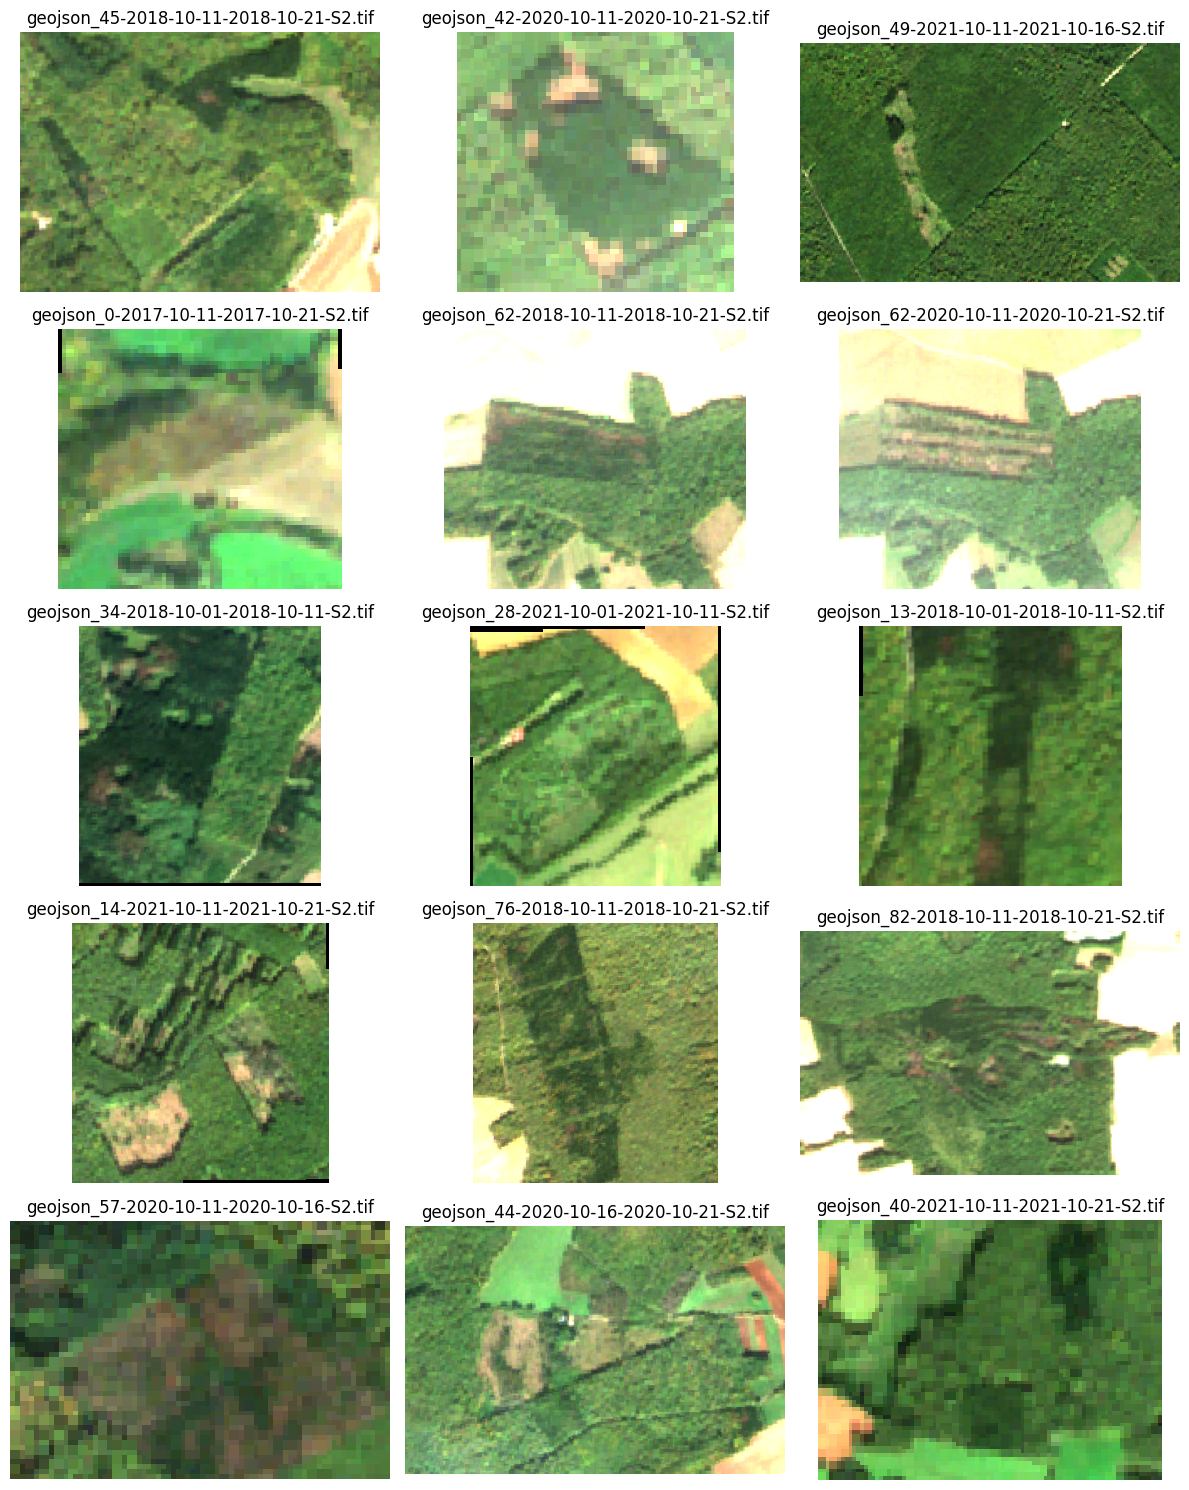

In [121]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Folder path containing the images
folder_path = '/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/{}'

# Get the first 15 filenames from the filtered DataFrame
filenames = filtered_more_than_70['File'].head(15).tolist()

# Create a subplot grid with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(12, 15))

# Iterate over the filenames and plot the images in the subplot grid
for i, filename in enumerate(filenames):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    folder_num = filename.split('_')[1][:2].rstrip('-')
    print(folder_num)
    
    # Read and display the image
    image_path = os.path.join(folder_path.format(folder_num), filename)
    image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(filename)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


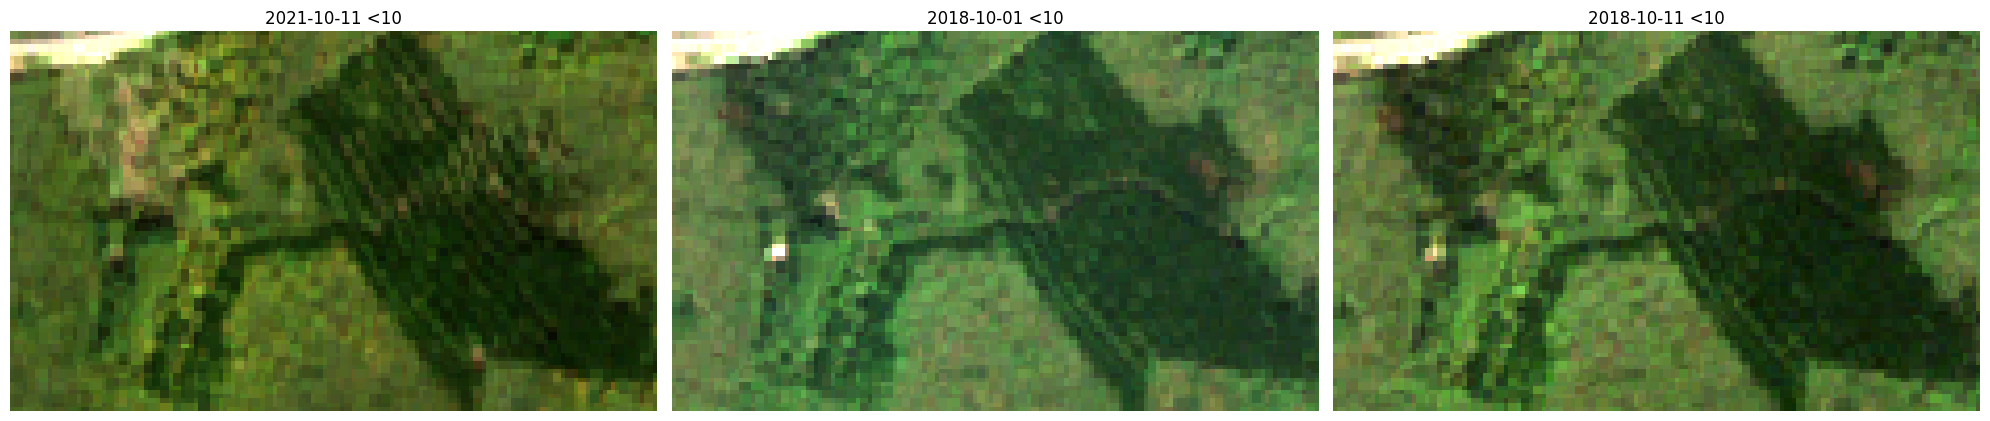

In [122]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the folders to plot
folders = ['70']

# Create a subplot grid with 1 row and 4 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Iterate over the folders
for i, folder in enumerate(folders):
    # Folder path containing the images
    folder_path = f'/kaggle/input/eripthack-data/SWIFTT_dataset_France_Hackaton/SWIFTT_dataset_France_Hackaton/{folder}'
    
    # Filter the DataFrame for the current folder and All Damage Persantage less than 10
    filtered_less_than_10 = filtered_df_oct[(filtered_df_oct['Folder'] == folder) & (filtered_df_oct['All Damage Persantage'] < 10)]
    # Get the filenames for the filtered records
    filenames_less_than_10 = filtered_less_than_10['File'].head(3).tolist()

    # Filter the DataFrame for the current folder and All Damage Persantage more than 70
    filtered_more_than_70 = filtered_df_oct[(filtered_df_oct['Folder'] == folder) & (filtered_df_oct['All Damage Persantage'] > 70)]
    # Get the filenames for the filtered records
    filenames_more_than_70 = filtered_more_than_70['File'].head(3).tolist()

    # Plot the first three filenames with All Damage Percentage less than 10 in the first row
    for j, filename in enumerate(filenames_less_than_10):
        ax = axes[j]  # Use j as the index for the subplots
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(str(np.datetime64(filtered_less_than_10['Start Date'].values[j], 'D')) + ' <10')
        ax.axis('off')

    # Plot the next three filenames with All Damage Percentage more than 70 in the second row
    for j, filename in enumerate(filenames_more_than_70):
        ax = axes[j+2]  # Use j+3 as the index for the subplots in the second row
        image_path = os.path.join(folder_path, filename)
        image = tifffile.imread(image_path)[..., [3, 2, 1]] * 12
        ax.imshow(image)
        ax.set_title(str(np.datetime64(filtered_more_than_70['Start Date'].values[j], 'D')) + ' >70')
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


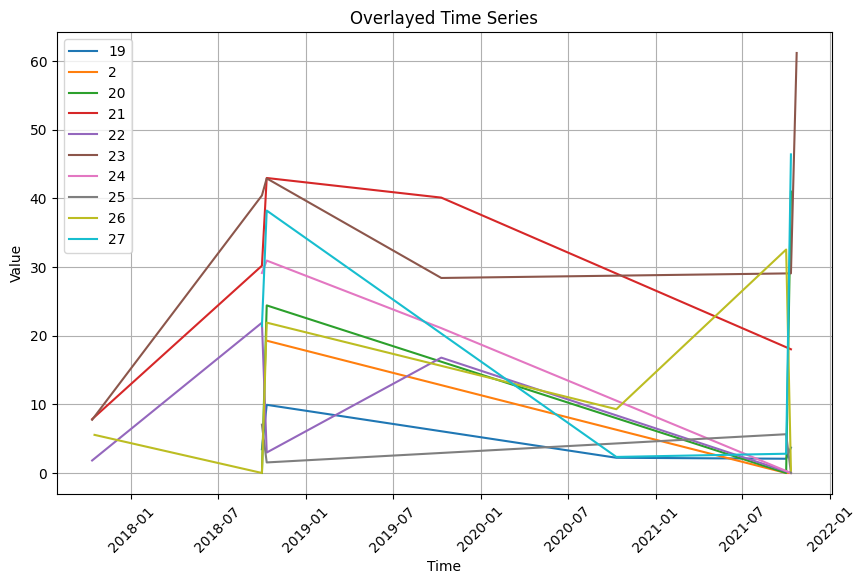

In [123]:
import matplotlib.pyplot as plt

# Set a custom color palette
# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Sort the data by "Start Date"
sorted_df = filtered_df_oct.sort_values('Start Date')

# Group the sorted data by "Folder"
grouped = sorted_df.groupby('Folder')

# Select specific folders by index
folder_indices = [i for i in range(len(grouped))][10:20]

# Create a subplot grid with 1 row and 1 column
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Iterate over the folder indices and plot the time series in the single subplot
for i, index in enumerate(folder_indices):
    # Get the group for the current folder index
    folder, group = list(grouped)[index]
    
    # Plot the time series with line plot
    ax.plot(group['Start Date'], group['All Damage Persantage'], linestyle='-', label=folder)
    
# Set the labels and title for the plot
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Overlayed Time Series')
    
# Add grid lines
ax.grid(True)

# Rotate x-axis labels by 45 degrees
ax.tick_params(axis='x', rotation=45)

# Add a legend
ax.legend()

# Show the plot
plt.show()
